In [3]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load data

TODO: pair-wise difference to baseline / baseline (use the COIN as baseline i.e.)

In [4]:
# filename = "/home/clevyfidel/Documents/Workspace/goin/opt_coin/output/inference_results_logpm_corr_512.pkl"
filename = "/home/clevyfidel/Documents/Workspace/goin/opt_coin/output/inference_results_512_mse_parallel.pkl"

with open(filename, 'rb') as f:
    data = pickle.load(f)

In [5]:
data # As a reminder, "small" ran with 2 samples, 5 timepoints, for each of the 8 configs

{0: {'gamma_t': np.float64(0.1),
  'alpha_t': np.float64(0.1),
  'rho_t': np.float64(0.1),
  'ctx_count': 3,
  'Python': {'time': 48.70535345474879,
   'logp_y_avg': array([0.73873126, 0.79835081, 0.74687882, 0.76451444, 0.65755069,
          0.76901332, 0.7296885 , 0.71564445, 0.73043025, 0.66431926,
          0.79048231, 0.78595435, 0.67784833, 0.72225797, 0.79114728,
          0.78291639, 0.8448271 , 0.81235921, 0.7995768 , 0.78528628,
          0.77922255, 0.75537497, 0.77412168, 0.78974863, 0.75710261,
          0.72185618, 0.69156814, 0.78078128, 0.79077699, 0.72796097,
          0.76526768, 0.83878887, 0.7685217 , 0.75508575, 0.73930899,
          0.75755921, 0.76904171, 0.7684034 , 0.74936328, 0.76900586,
          0.76009904, 0.82947594, 0.76050455, 0.68405998, 0.78992245,
          0.78466449, 0.72215451, 0.80069313, 0.77330099, 0.7329582 ,
          0.79832474, 0.76318487, 0.77664151, 0.76536507, 0.75652342,
          0.77135565, 0.78502917, 0.7362911 , 0.74557094, 0.7278069

In [6]:
data.keys()# should print 27 diff

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

In [7]:
data[0].keys()

dict_keys(['gamma_t', 'alpha_t', 'rho_t', 'ctx_count', 'Python', 'Leaky', 'Matlab'])

## Create datasets

In [8]:
df_logpy = []
df_logpc = [] 
df_time = [] 
df_mse = [] 

for id_config in data.keys():
    df_logpy_partial = pd.DataFrame.from_dict({'python': data[id_config]['Python']['logp_y_avg'],
                               'matlab': data[id_config]['Matlab']['logp_y_avg'],
                               'leaky': data[id_config]['Leaky']['logp_y_avg']})
    df_logpy_partial['config'] = id_config
    df_logpy.append(df_logpy_partial)

    
    df_logpc_partial = pd.DataFrame.from_dict({'python': data[id_config]['Python']['logp_c_avg'],
                               'matlab': data[id_config]['Matlab']['logp_c_avg'],
                               'leaky': data[id_config]['Leaky']['logp_c_avg']})
    df_logpc_partial['config'] = id_config
    df_logpc.append(df_logpc_partial)

    df_mse_partial = pd.DataFrame.from_dict({'python': data[id_config]['Python']['mse_y_avg'],
                               'matlab': data[id_config]['Matlab']['mse_y_avg'],
                               'leaky': data[id_config]['Leaky']['mse_y_avg']})
    df_mse_partial['config'] = id_config
    df_mse.append(df_mse_partial)


    df_time_partial = {'python': data[id_config]['Python']['time'],
                       'matlab': data[id_config]['Matlab']['time'],
                       'leaky': data[id_config]['Leaky']['time'],
                       'config': id_config}
    df_time.append(df_time_partial)

df_logpy = pd.concat(df_logpy, ignore_index=True)
df_logpc = pd.concat(df_logpc, ignore_index=True)
df_mse = pd.concat(df_mse, ignore_index=True)
df_time = pd.DataFrame(df_time)

In [9]:
df_logpy.describe()

python        matlab         leaky        config
count  13824.000000  13824.000000  1.382400e+04  13824.000000
mean       0.364596      0.365125 -3.628008e+03     13.000000
std        0.751028      0.785707  2.741338e+05      7.789163
min      -23.138439    -30.056800 -3.032005e+07      0.000000
25%        0.252545      0.254042 -3.828021e+00      6.000000
50%        0.704743      0.708710 -1.246220e+00     13.000000
75%        0.768138      0.770835  2.959039e-01     20.000000
max        0.890202      0.898159  7.455996e-01     26.000000

In [10]:
df_logpc.describe()

/home/clevyfidel/anaconda3/envs/coin/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/clevyfidel/anaconda3/envs/coin/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/clevyfidel/anaconda3/envs/coin/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


python        matlab         leaky        config
count  1.382400e+04  1.382400e+04  1.382400e+04  13824.000000
mean           -inf          -inf          -inf     13.000000
std             NaN           NaN           NaN      7.789163
min            -inf          -inf          -inf      0.000000
25%   -2.932800e+00 -2.746323e+00 -2.232474e+00      6.000000
50%   -1.704984e-01 -1.659968e-01 -6.696886e-01     13.000000
75%   -2.056439e-03 -2.434007e-03 -9.664851e-02     20.000000
max   -9.283729e-05 -9.296308e-05 -1.757915e-02     26.000000

## Melt datasets for visualisations

In [70]:
# Melt the 3 models columns in one categorical one
df_logpy_ = df_logpy.melt(id_vars='config', value_vars=['python', 'matlab', 'leaky'], var_name='model', value_name='logpy')
df_logpc_ = df_logpc.melt(id_vars='config', value_vars=['python', 'matlab', 'leaky'], var_name='model', value_name='logpc')
df_mse_ = df_mse.melt(id_vars='config', value_vars=['python', 'matlab', 'leaky'], var_name='model', value_name='mse')
df_time_ = df_time.melt(id_vars='config', value_vars=['python', 'matlab', 'leaky'], var_name='model', value_name='time')

In [78]:
# Replace -inf values by the smallest value reached for the specific (model, config_id) config
ni_mins = df_logpc_.groupby(['config', 'model']).apply(lambda x: x[np.isfinite(x)].min()).reset_index().rename(columns={'logpc': 'logpc_non_inf_min'})
df_logpc_min_ = df_logpc_.assign(logpc_min = pd.merge(df_logpc_, ni_mins, on=['config', 'model'])[['logpc', 'logpc_non_inf_min']].max(axis=1))

In [81]:
df_logpc_min = pd.get_dummies(df_logpc_min_)
df_logpc_min['model']=df_logpc_min.apply(lambda x: 'python' if x['model_python'] else 'matlab' if x['model_matlab'] else 'leaky', axis=1)
df_logpc_min.drop(columns=['model_python', 'model_matlab', 'model_leaky'], inplace=True)
df_logpc_min

config     logpc  logpc_min   model
0           0 -0.004098  -0.004098  python
1           0 -0.000118  -0.000118  python
2           0 -0.000121  -0.000121  python
3           0 -0.000669  -0.000669  python
4           0 -0.000099  -0.000099  python
...       ...       ...        ...     ...
41467      26 -2.792780  -2.792780   leaky
41468      26 -2.680923  -2.680923   leaky
41469      26 -3.524938  -3.524938   leaky
41470      26 -3.223889  -3.223889   leaky
41471      26 -2.677025  -2.677025   leaky

[41472 rows x 4 columns]

In [15]:
# What are the minimum values if we exclude the inf values
df_logpc[np.isfinite(df_logpc)].min()

python   -10.174879
matlab   -10.225254
leaky    -10.420318
config     0.000000
dtype: float64

In [16]:
# Verify that the inf values are only negative and print out the max values
if (df_logpc.max() == df_logpc[np.isfinite(df_logpc)].max()).all(): print(df_logpc.max())

python    -0.000093
matlab    -0.000093
leaky     -0.017579
config    26.000000
dtype: float64


In [17]:
df_logpc.groupby('config').agg([('inf_val_count', lambda x: (~np.isfinite(x)).sum())]) # reminder: 512 values per config

python        matlab         leaky
       inf_val_count inf_val_count inf_val_count
config                                          
0                  2             2             0
1                  8             8             0
2                 63            61             1
3                  1             0             0
4                 30            21             1
5                222           212             2
6                  3             0             0
7                 47            44             1
8                270           249             0
9                  0             0             0
10                 9             4             1
11                35            34             0
12                 1             2             0
13                29            24             0
14               239           226             0
15                 0             0             0
16                56            46             0
17               303           293             0
18                 0             1             0
19                 5             5             0
20                16            21             0
21                 1             2             1
22                22            11             0
23               204           179             0
24                 0             0             0
25                49            43             0
26               333           299             0

In [18]:
# # Logp y (observations)
# krows = 3
# fig, axs = plt.subplots(krows, len(data.keys())//krows, figsize=(15, 10))
# for i in range(len(data.keys())):
#     sns.histplot(data=data[i]['Python']['logp_y_avg'], ax=axs.flatten()[i], kde=True)
#     sns.histplot(data=data[i]['Matlab']['logp_y_avg'], ax=axs.flatten()[i], kde=True)
#     sns.histplot(data=data[i]['Leaky']['logp_y_avg'], ax=axs.flatten()[i], kde=True)
#     # axs.flatten()[i].hist(data[i]['Python']['logp_y_avg'])
#     # axs.flatten()[i].hist(data[i]['Matlab']['logp_y_avg'])
#     # axs.flatten()[i].hist(data[i]['Leaky']['logp_y_avg'])

## Params config and N ctxs

In [39]:
df_params = [] 
for id_config in data.keys(): # 'gamma_t', 'alpha_t', 'rho_t'
    
    df_params_partial = {'gamma_t': data[id_config]['gamma_t'], # gamma_context
                       'alpha_t': data[id_config]['alpha_t'], # alpha_context
                       'rho_t': data[id_config]['rho_t'], # rho_context
                       'n_ctx': data[id_config]['ctx_count'], # '# contexts'
                       'config': id_config}
    df_params.append(df_params_partial)

pd.set_option('display.max_columns', None)
df_params = pd.DataFrame(df_params)
df_params['config'] = df_params['config'].astype(int)
df_params.set_index('config').transpose() # .apply(lambda x: f"{data[id_config]['ctx_count']:.0f}")

config    0    1     2    3     4     5     6     7     8    9    10    11  \
gamma_t  0.1  1.0  10.0  0.1   1.0  10.0   0.1   1.0  10.0  0.1  1.0  10.0   
alpha_t  0.1  0.1   0.1  1.0   1.0   1.0  10.0  10.0  10.0  0.1  0.1   0.1   
rho_t    0.1  0.1   0.1  0.1   0.1   0.1   0.1   0.1   0.1  0.5  0.5   0.5   
n_ctx    3.0  5.0  19.0  3.0  11.0  37.0   4.0  15.0  50.0  3.0  5.0  10.0   

config    12   13    14    15    16    17   18   19    20   21   22    23  \
gamma_t  0.1  1.0  10.0   0.1   1.0  10.0  0.1  1.0  10.0  0.1  1.0  10.0   
alpha_t  1.0  1.0   1.0  10.0  10.0  10.0  0.1  0.1   0.1  1.0  1.0   1.0   
rho_t    0.5  0.5   0.5   0.5   0.5   0.5  0.9  0.9   0.9  0.9  0.9   0.9   
n_ctx    3.0  7.0  30.0   4.0  12.0  41.0  3.0  4.0   6.0  4.0  6.0  18.0   

config     24    25    26  
gamma_t   0.1   1.0  10.0  
alpha_t  10.0  10.0  10.0  
rho_t     0.9   0.9   0.9  
n_ctx     4.0   9.0  25.0

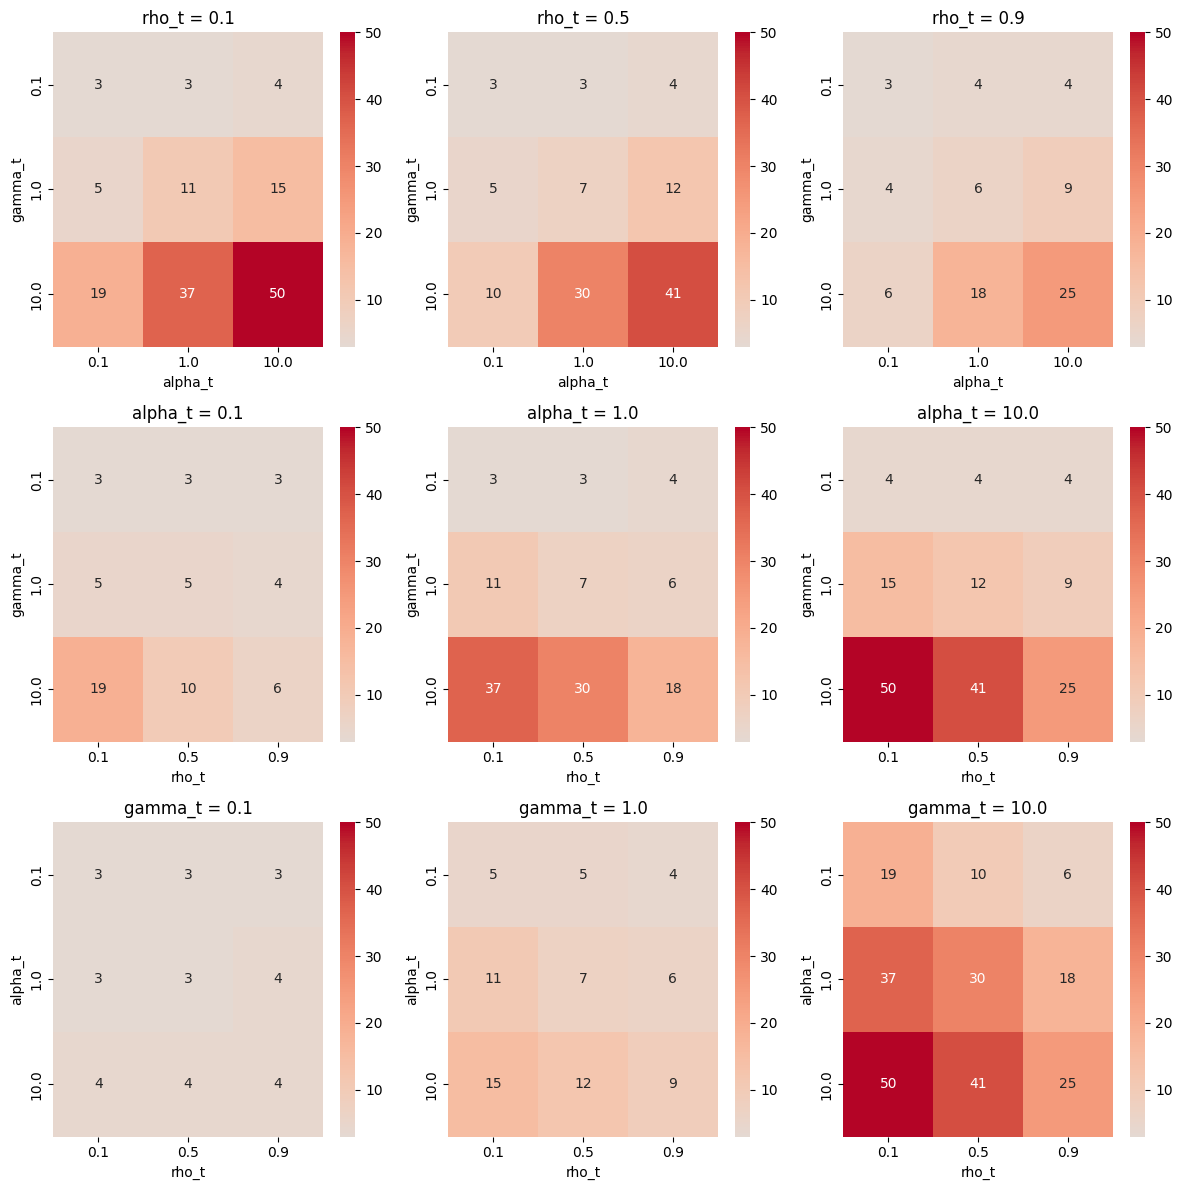

In [40]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
vmin = df_params['n_ctx'].min()
vmax = df_params['n_ctx'].max()
for i in range(3):
    heatmap_data = df_params[df_params['rho_t'] == df_params['rho_t'].unique()[i]].pivot_table(
        index='gamma_t', 
        columns='alpha_t', 
        values='n_ctx', 
    )
    sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', ax=axs.flatten()[i], vmin=vmin, vmax=vmax, center=0)
    axs.flatten()[i].set_title(f"rho_t = {df_params['rho_t'].unique()[i]}")

    heatmap_data = df_params[df_params['alpha_t'] == df_params['alpha_t'].unique()[i]].pivot_table(
        index='gamma_t', 
        columns='rho_t', 
        values='n_ctx', 
    )
    sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', ax=axs.flatten()[i+3], vmin=vmin, vmax=vmax, center=0)
    axs.flatten()[i+3].set_title(f"alpha_t = {df_params['alpha_t'].unique()[i]}")

    heatmap_data = df_params[df_params['gamma_t'] == df_params['gamma_t'].unique()[i]].pivot_table(
        index='alpha_t', 
        columns='rho_t', 
        values='n_ctx', 
    )
    sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', ax=axs.flatten()[i+6], vmin=vmin, vmax=vmax, center=0)
    axs.flatten()[i+6].set_title(f"gamma_t = {df_params['gamma_t'].unique()[i]}")


plt.tight_layout()

# python VS matlab

## Logpy

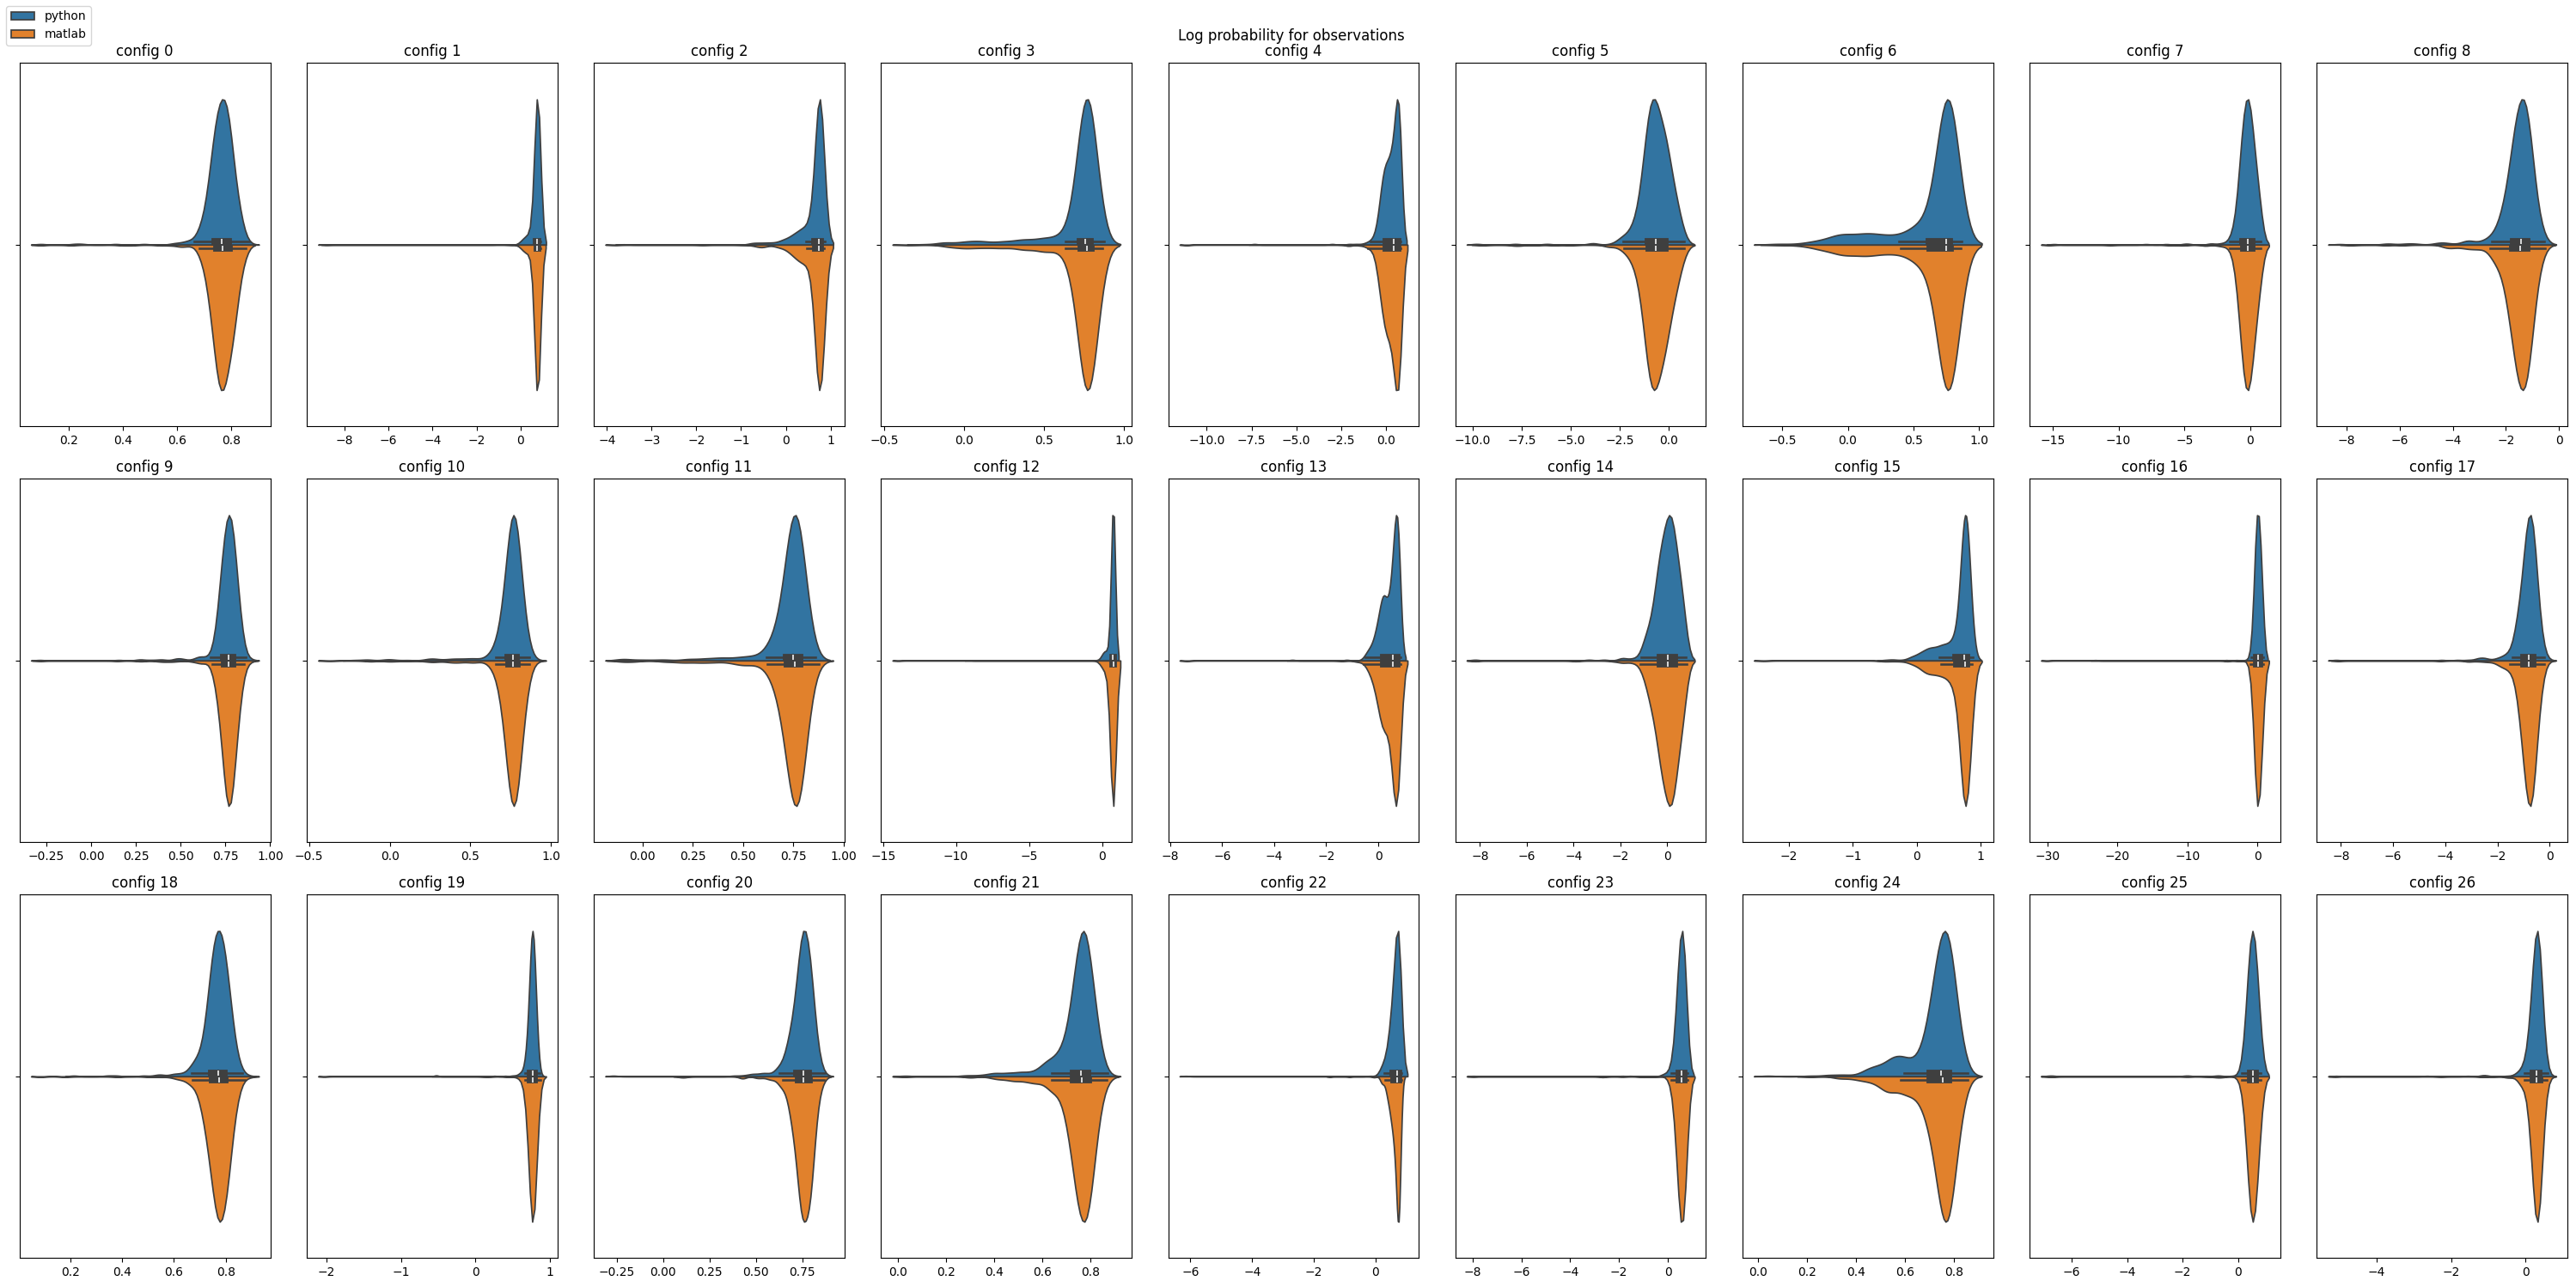

In [36]:
# Logp y (observations) -- COIN model only

df_logpy_coin = df_logpy_.drop(df_logpy_[df_logpy_['model']=='leaky'].index)
krows = 3
fig, axs = plt.subplots(krows, len(data.keys())//krows, figsize=(30, 15))
for i in range(len(df_logpy_.config.unique())):
    # sns.histplot(data=df_logpy_[df_logpy_['config']==i], x='logpy', ax=axs.flatten()[i], kde=True, hue='model')
    sns.violinplot(data=df_logpy_coin[df_logpy_coin['config']==i], x='logpy', ax=axs.flatten()[i], hue='model', log_scale=False, split=True)
    if i == 0: 
        handles, labels = axs.flatten()[i].get_legend_handles_labels()
        axs.flatten()[i].get_legend().remove()
        fig.legend(handles, labels, loc='upper left')
    else: axs.flatten()[i].get_legend().remove()
    axs.flatten()[i].set_xlabel('')
    axs.flatten()[i].set_title(f'config {i}')
fig.suptitle('Log probability for observations')
plt.tight_layout()

## Logpc

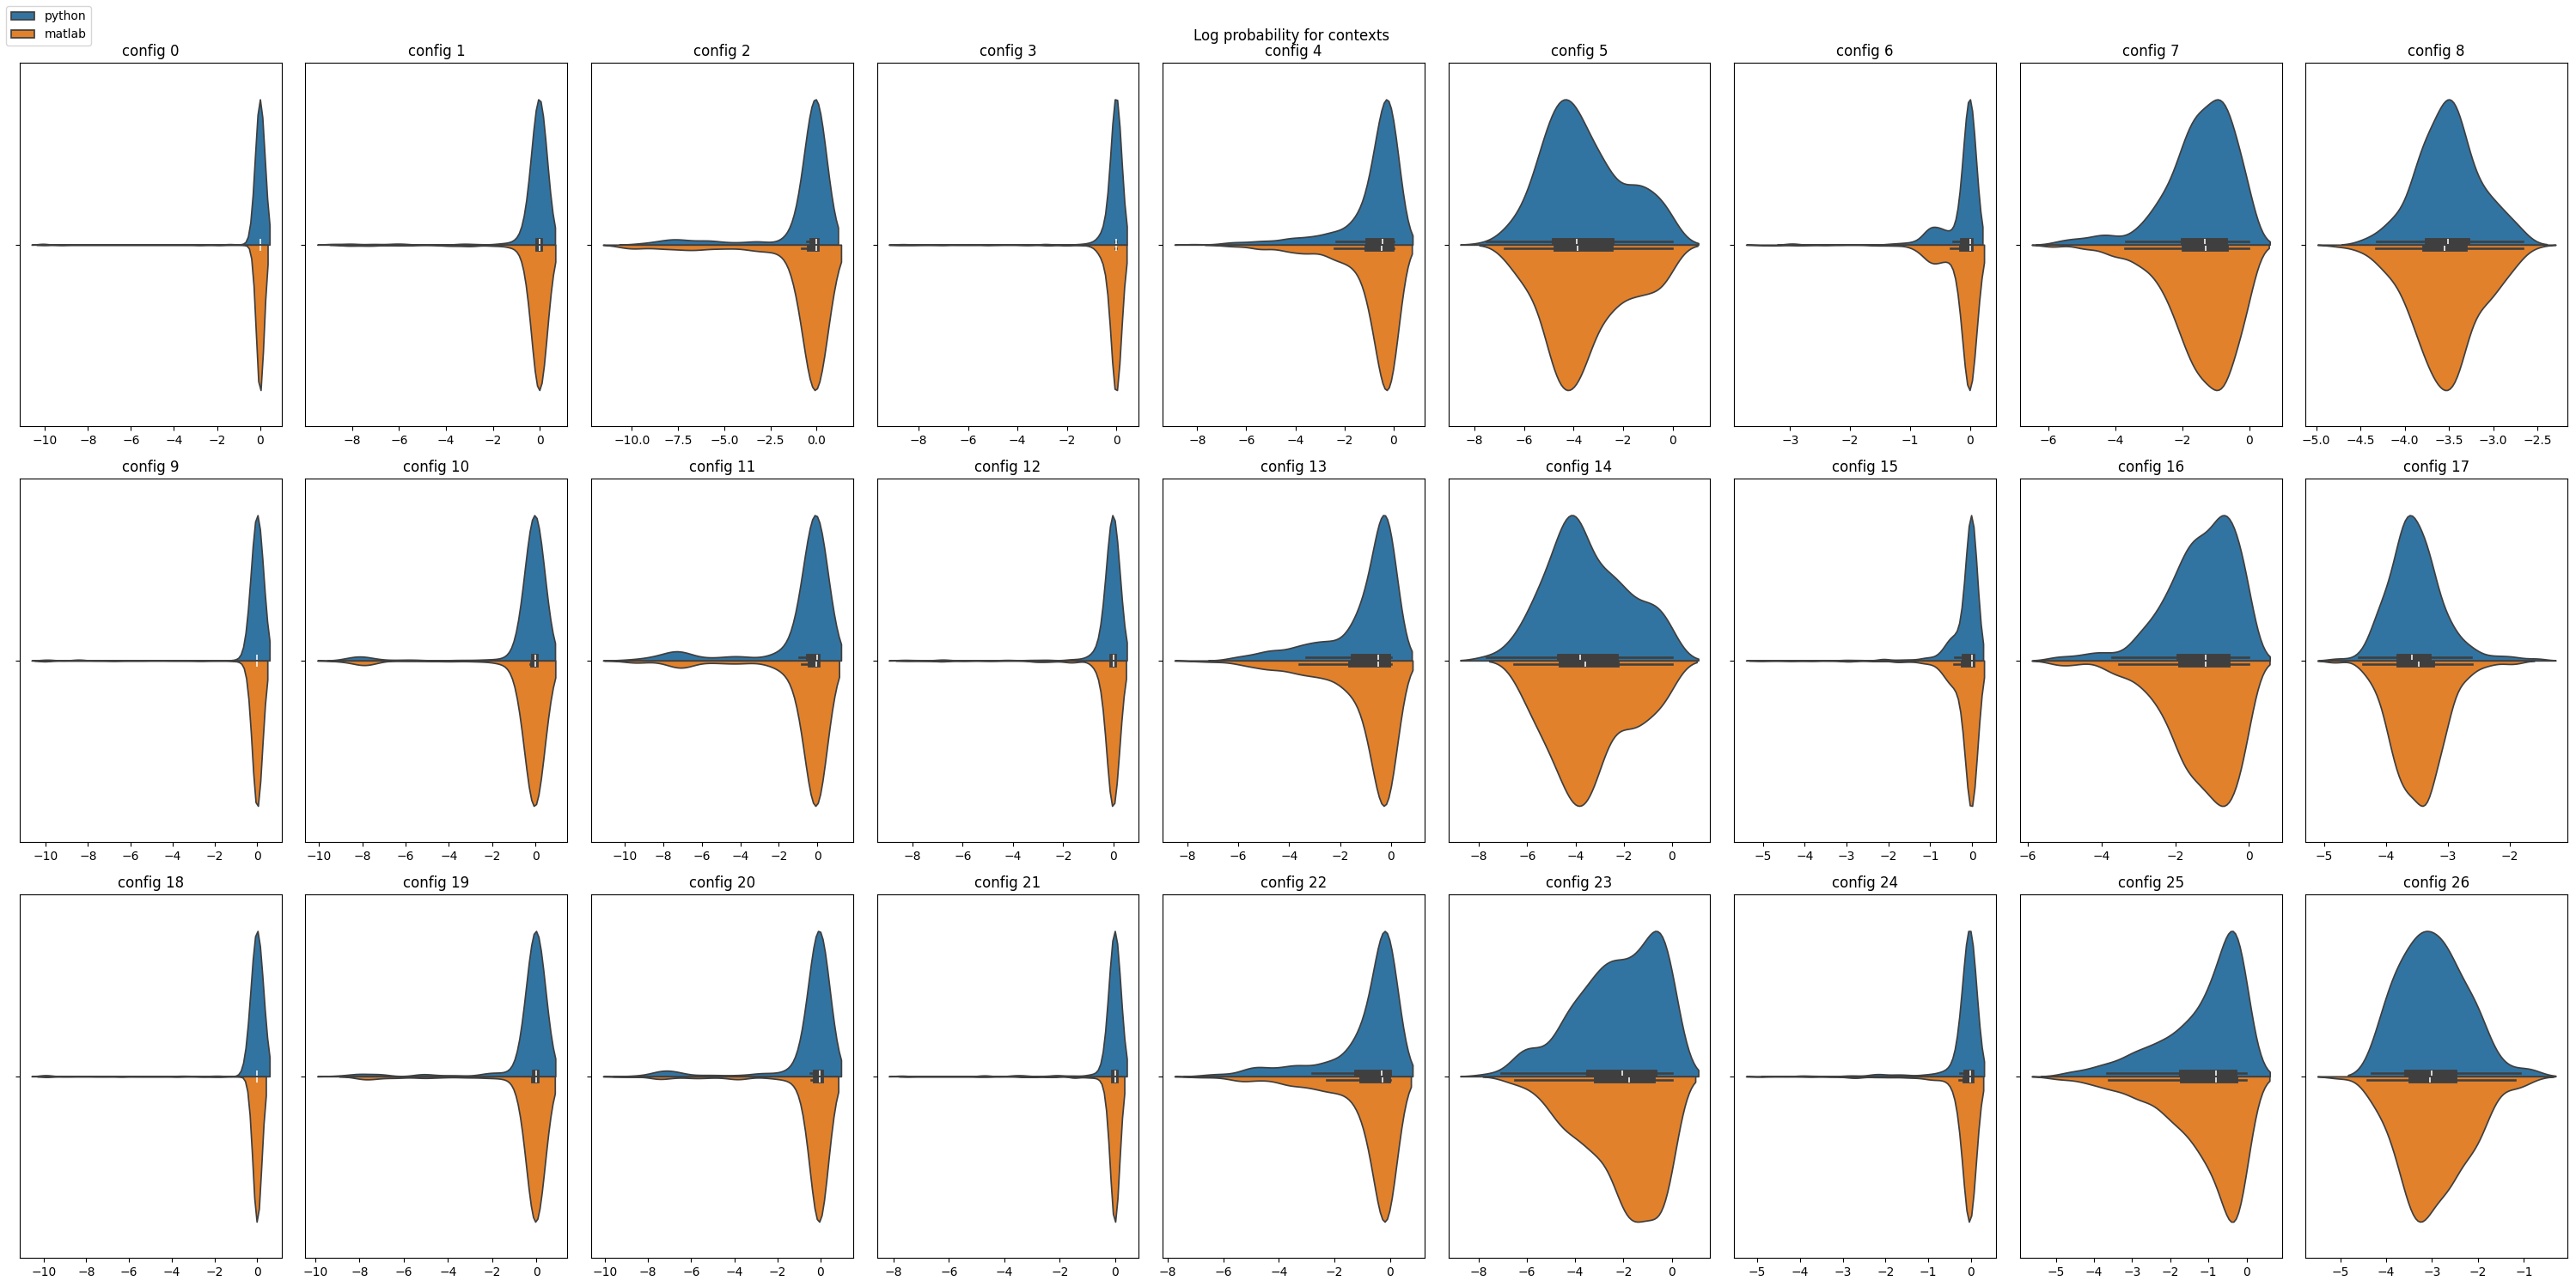

In [37]:
# Logp c (contexts) -- COIN model only

df_logpc_coin = df_logpc_.drop(df_logpc_[df_logpc_['model']=='leaky'].index)
krows = 3
fig, axs = plt.subplots(krows, len(data.keys())//krows, figsize=(30, 15))
for i in range(len(df_logpc_.config.unique())):
    sns.violinplot(data=df_logpc_coin[df_logpc_coin['config']==i], x='logpc', ax=axs.flatten()[i], hue='model', log_scale=False, split=True)
    if i == 0: 
        handles, labels = axs.flatten()[i].get_legend_handles_labels()
        axs.flatten()[i].get_legend().remove()
        fig.legend(handles, labels, loc='upper left')
    else: axs.flatten()[i].get_legend().remove()
    axs.flatten()[i].set_xlabel('')
    axs.flatten()[i].set_title(f'config {i}')
fig.suptitle('Log probability for contexts')
plt.tight_layout()

## Time

In [41]:
(df_time['python']/df_time['matlab']).mean(), (df_time['python']/df_time['matlab']).std()

(np.float64(3.883712467783644), np.float64(0.6895736830777772))

## MSE

In [34]:
df_mse.describe()

python        matlab         leaky        config
count  1.382400e+04  1.382400e+04  1.382400e+04  13824.000000
mean   7.962768e+02  1.133431e+03  7.734894e+02     13.000000
std    4.498761e+04  6.569906e+04  5.355361e+04      7.789163
min    9.683466e-03  9.775769e-03  1.016188e-02      0.000000
25%    1.538811e-02  1.538523e-02  1.802369e-02      6.000000
50%    5.488601e-02  5.467268e-02  4.802799e-02     13.000000
75%    7.503677e-01  7.683575e-01  6.450282e-01     20.000000
max    4.233555e+06  5.979895e+06  5.793699e+06     26.000000

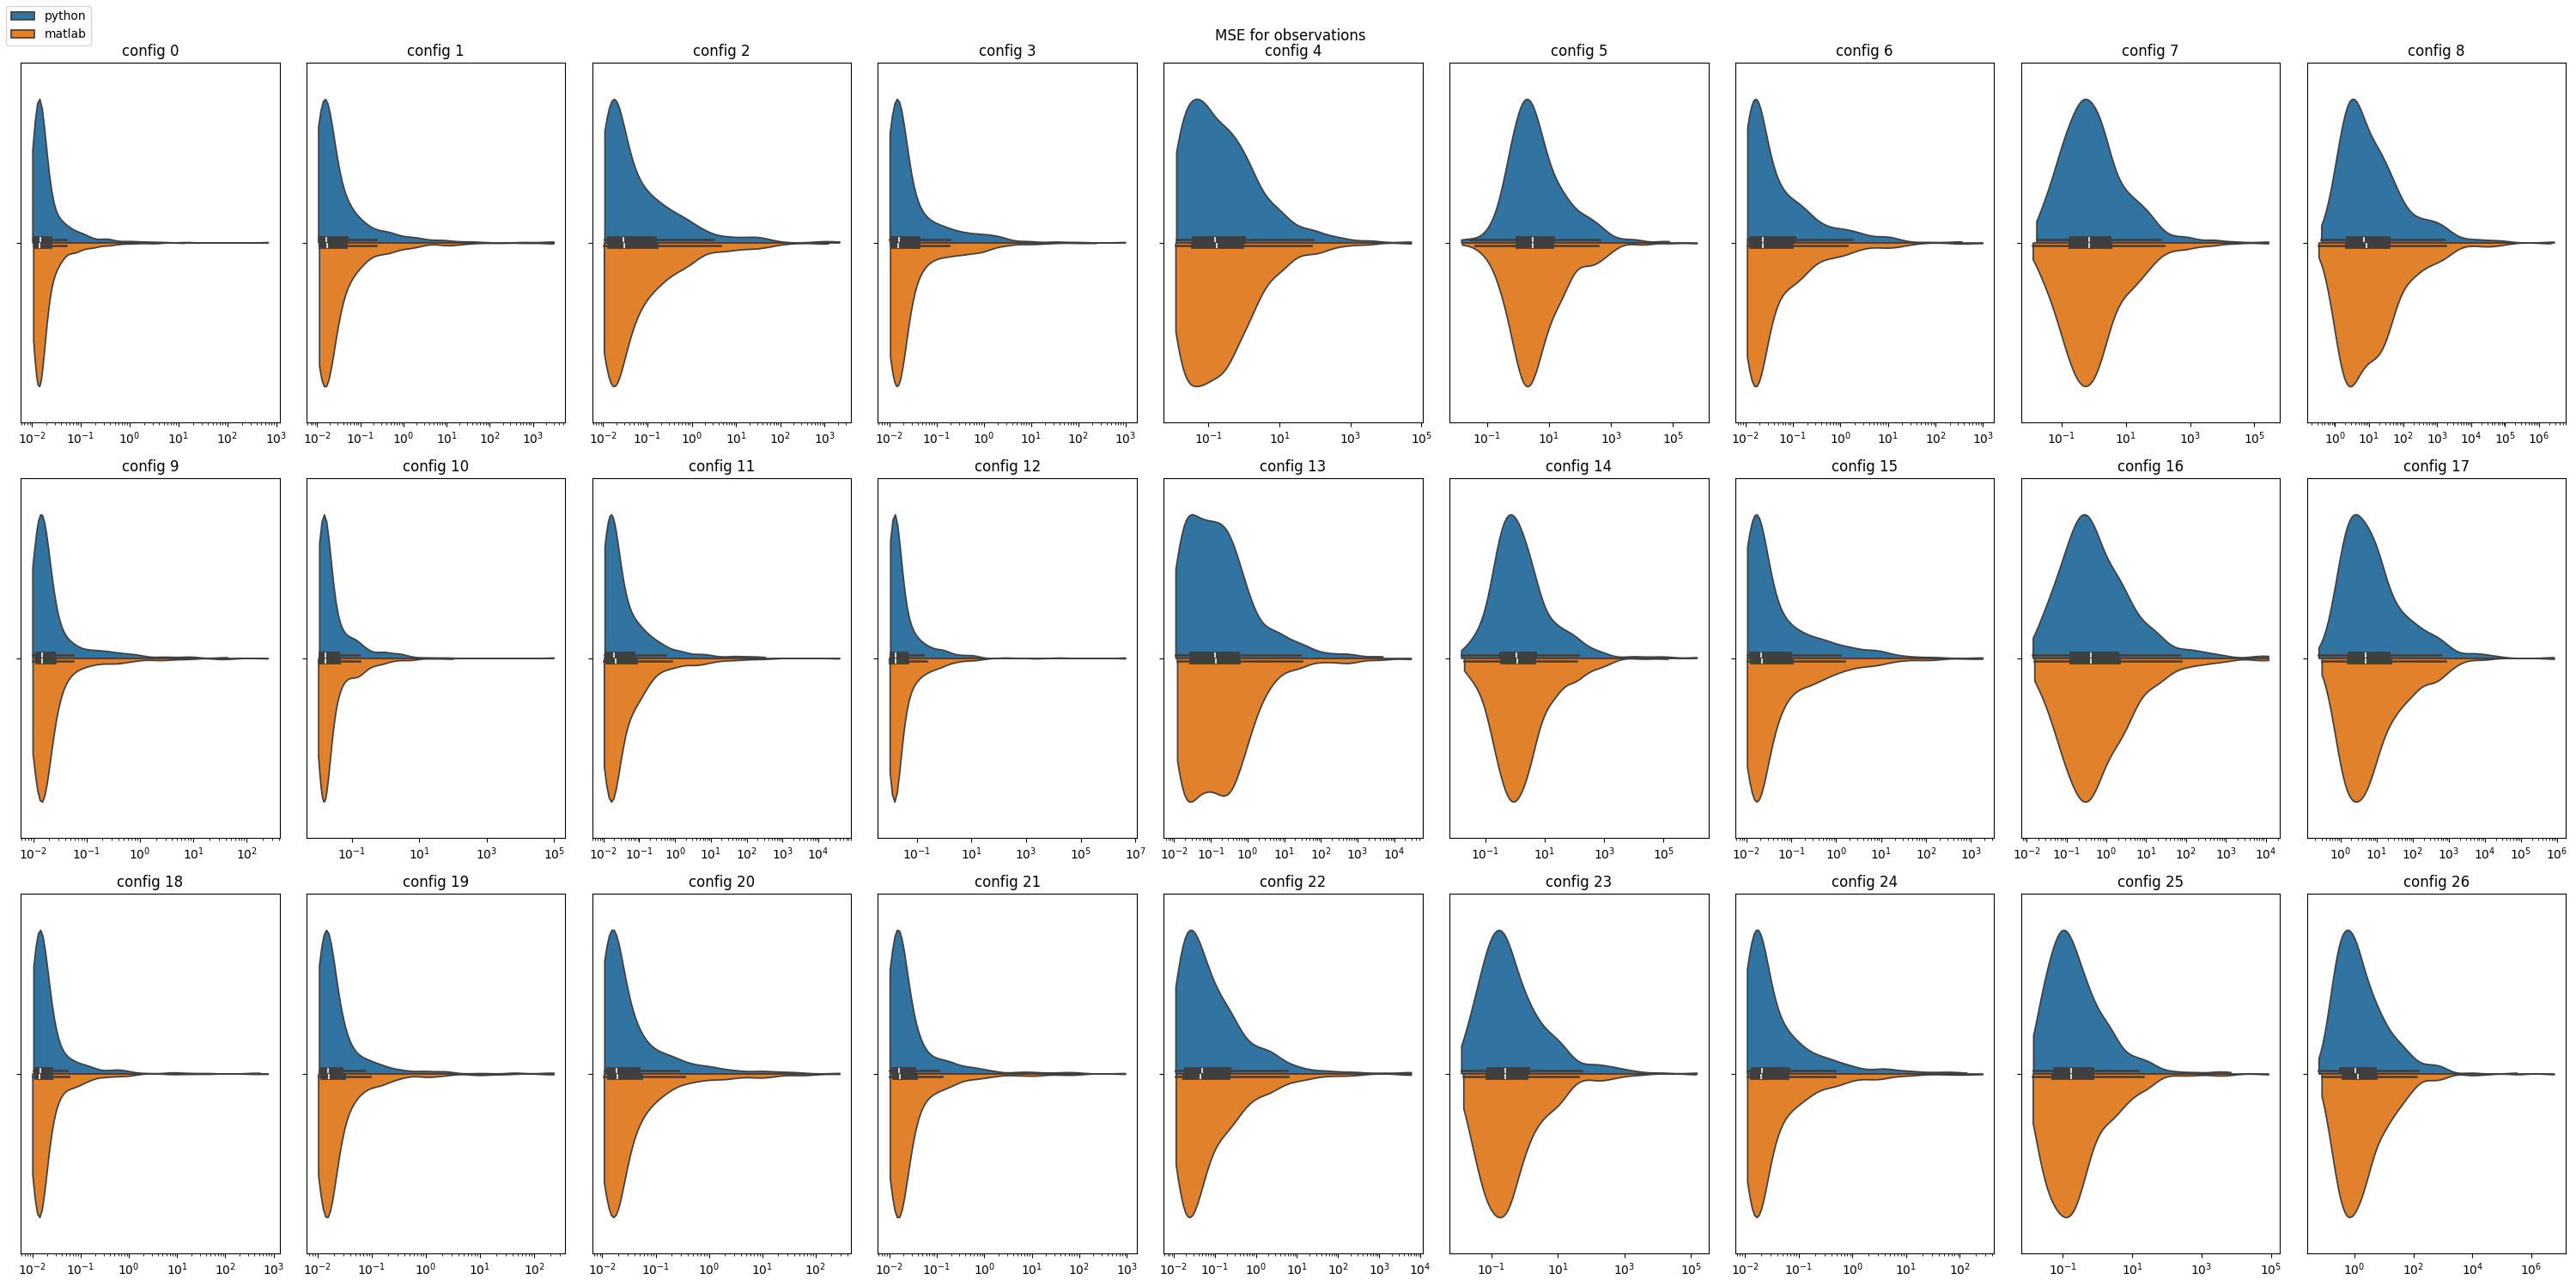

In [ ]:
# MSE -- COIN model only

df_mse_coin = df_mse_.drop(df_mse_[df_mse_['model']=='leaky'].index)
krows = 3
fig, axs = plt.subplots(krows, len(data.keys())//krows, figsize=(30, 15))
for i in range(len(df_mse_coin.config.unique())):
    # sns.histplot(data=df_mse_coin[df_mse_coin['config']==i], x='mse', ax=axs.flatten()[i], kde=True, hue='model')
    sns.violinplot(data=df_mse_coin[df_mse_coin['config']==i], x='mse', ax=axs.flatten()[i], hue='model', log_scale=True, split=True, cut=0)
    if i == 0: 
        handles, labels = axs.flatten()[i].get_legend_handles_labels()
        axs.flatten()[i].get_legend().remove()
        fig.legend(handles, labels, loc='upper left')
    else: axs.flatten()[i].get_legend().remove()
    axs.flatten()[i].set_xlabel('')
    axs.flatten()[i].set_title(f'config {i}')
fig.suptitle('MSE for observations')
plt.tight_layout()

# COIN vs LEAKY (relative)

## Logpy

### Violinplots with logscale

configs >= 18 correspond to rho_context = 0.9 (max considered rho value)

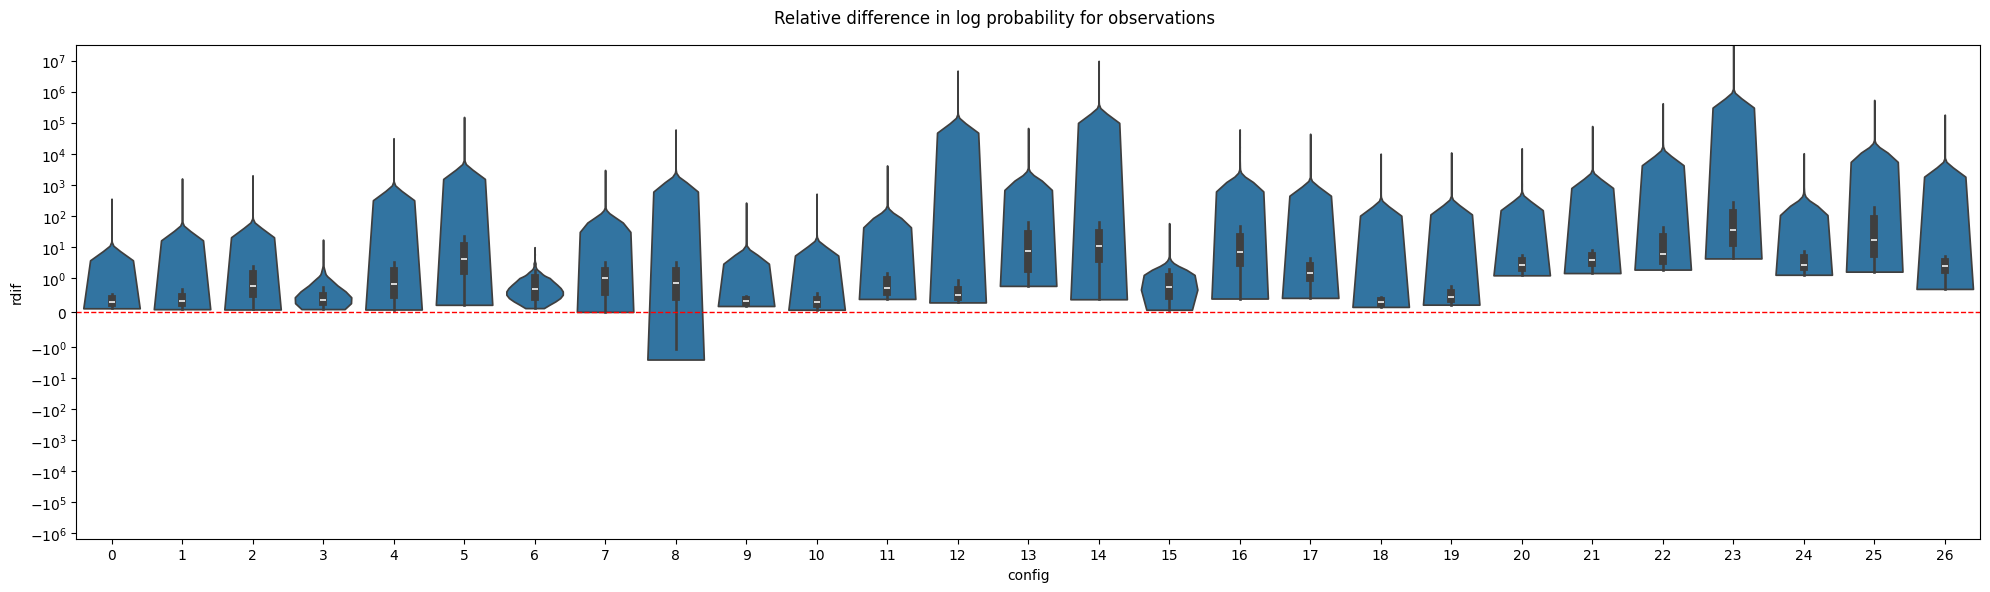

In [ ]:
# Logp y (observations)
df_logpy_r = df_logpy[['python', 'leaky', 'config']]
df_logpy_r['rdif'] = (df_logpy_r['python'] - df_logpy_r['leaky']) # /df_logpy_r['leaky'] # relative point by point difference

fig, axs = plt.subplots(1,1,figsize=(20, 6))
sns.violinplot(data=df_logpy_r, y='rdif', x='config', ax=axs, dodge='auto', cut=0, density_norm="count")
axs.set_yscale('symlog', linthresh=1)
axs.axhline(0, color='red', linestyle='--', linewidth=1)
fig.suptitle('Relative difference in log probability for observations')
plt.tight_layout()

### With parameter heatmaps

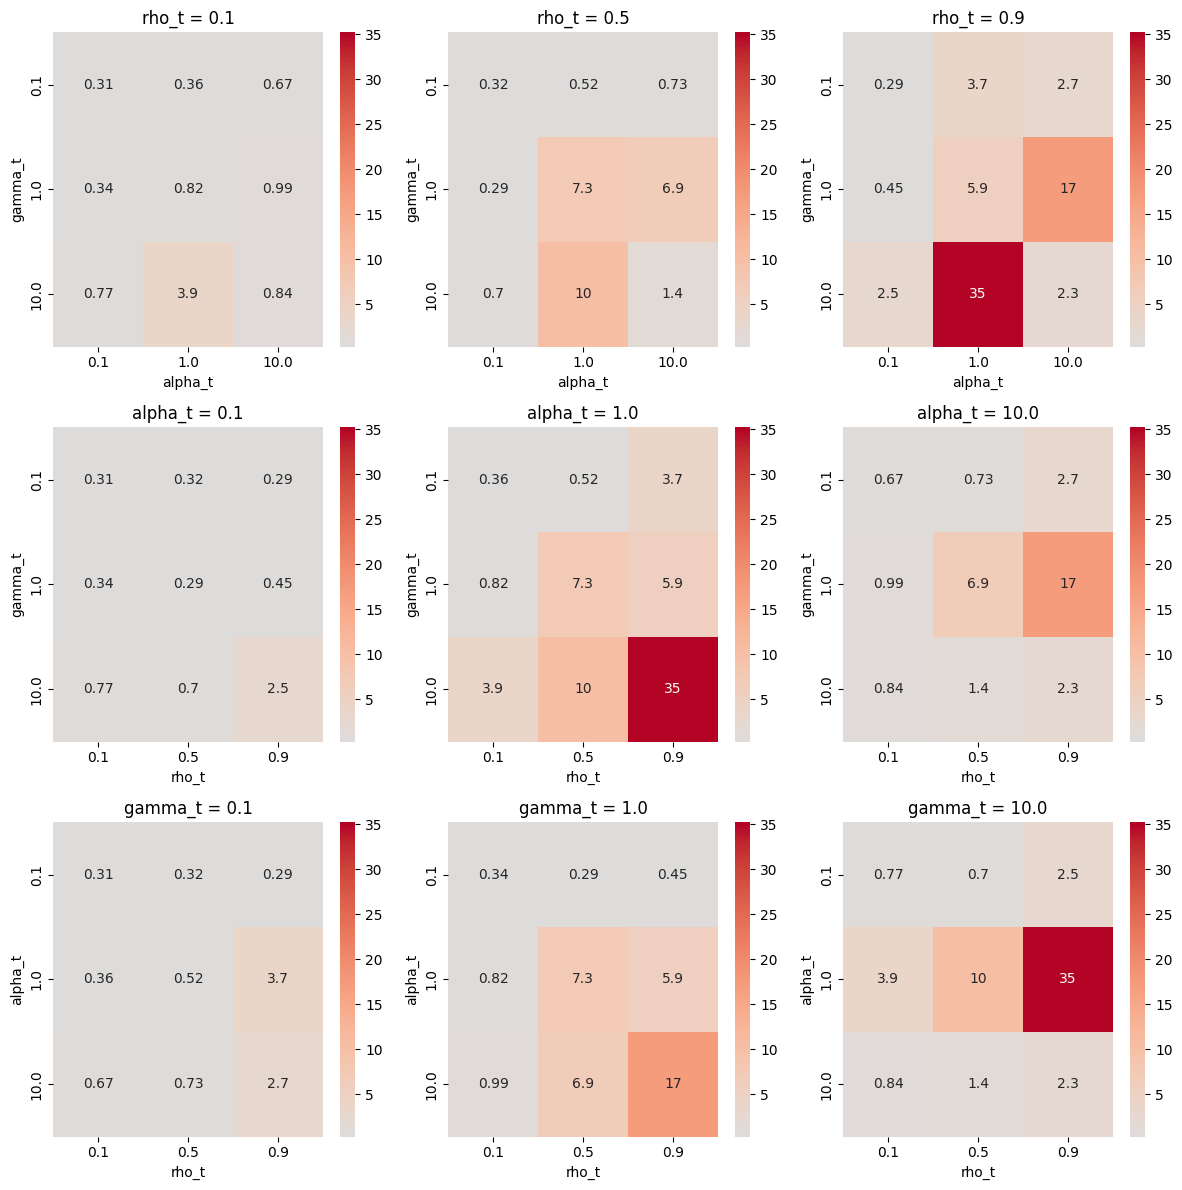

In [66]:
df_logpy_r = []

for id_config in data.keys():
    df_logpy_r_partial = pd.DataFrame.from_dict({'python': data[id_config]['Python']['logp_y_avg'],
                               'leaky': data[id_config]['Leaky']['logp_y_avg']})
    df_logpy_r_partial['config'] = id_config
    df_logpy_r_partial['alpha_t'] = data[id_config]['alpha_t']
    df_logpy_r_partial['gamma_t'] = data[id_config]['gamma_t']
    df_logpy_r_partial['rho_t'] = data[id_config]['rho_t']
    df_logpy_r_partial['n_ctx'] = data[id_config]['ctx_count']

 
    df_logpy_r.append(df_logpy_r_partial)
df_logpy_r = pd.concat(df_logpy_r, ignore_index=True)
df_logpy_r['rdif'] = (df_logpy_r['python'] - df_logpy_r['leaky']) # /df_logpy_r['leaky'] # relative point by point difference

fig, axs = plt.subplots(3, 3, figsize=(12, 12))
vmin = df_logpy_r.groupby(['alpha_t', 'gamma_t', 'rho_t'])['rdif'].median().min()
vmax = df_logpy_r.groupby(['alpha_t', 'gamma_t', 'rho_t'])['rdif'].median().max()
for i in range(3):
    heatmap_data = df_logpy_r[df_logpy_r['rho_t'] == df_logpy_r['rho_t'].unique()[i]].pivot_table(
        index='gamma_t', 
        columns='alpha_t', 
        values='rdif', 
        aggfunc='median'
    )
    sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', ax=axs.flatten()[i], vmin=vmin, vmax=vmax, center=0)
    axs.flatten()[i].set_title(f"rho_t = {df_logpy_r['rho_t'].unique()[i]}")

    heatmap_data = df_logpy_r[df_logpy_r['alpha_t'] == df_logpy_r['alpha_t'].unique()[i]].pivot_table(
        index='gamma_t', 
        columns='rho_t', 
        values='rdif', 
        aggfunc='median'
    )
    sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', ax=axs.flatten()[i+3], vmin=vmin, vmax=vmax, center=0)
    axs.flatten()[i+3].set_title(f"alpha_t = {df_logpy_r['alpha_t'].unique()[i]}")

    heatmap_data = df_logpy_r[df_logpy_r['gamma_t'] == df_logpy_r['gamma_t'].unique()[i]].pivot_table(
        index='alpha_t', 
        columns='rho_t', 
        values='rdif', 
        aggfunc='median'
    )
    sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', ax=axs.flatten()[i+6], vmin=vmin, vmax=vmax, center=0)
    axs.flatten()[i+6].set_title(f"gamma_t = {df_logpy_r['gamma_t'].unique()[i]}")


plt.tight_layout()

conclusion of heatmaps: increasing rho_t and alpha_t make leaky logpys higher than python

## Logpc

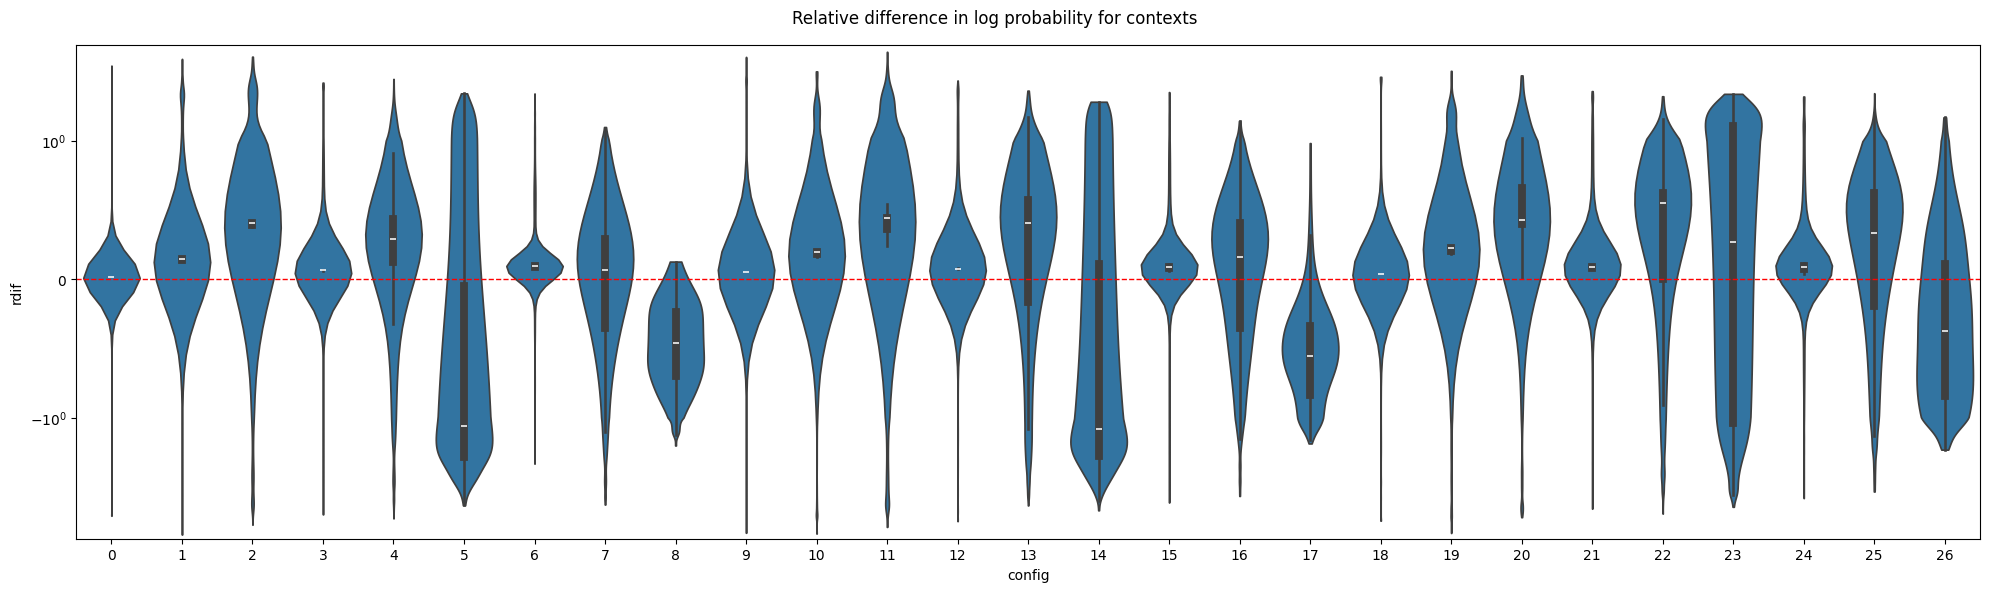

In [82]:
# Logp c (contexts)
df_logpc_r = df_logpc[['python', 'leaky', 'config']]
df_logpc_r['rdif'] = (df_logpc_r['python'] - df_logpc_r['leaky']) # /df_logpc_r['leaky']

fig, axs = plt.subplots(1,1,figsize=(20, 6))
sns.violinplot(data=df_logpc_r, y='rdif', x='config', ax=axs, dodge='auto', cut=0, density_norm="width")
axs.set_yscale('symlog', linthresh=1)
axs.axhline(0, color='red', linestyle='--', linewidth=1)
fig.suptitle('Relative difference in log probability for contexts')
plt.tight_layout()

In [55]:
df_logpc_r = df_logpc[['python', 'leaky', 'config']]
df_logpc_r['rdif'] = (df_logpc_r['python'] - df_logpc_r['leaky'])/df_logpc_r['leaky']
rdif_c_leaky = df_logpc_r.groupby('config').rdif.median()
rdif_c_leaky[rdif_c_leaky>=0]

config
5     1.189967
8          inf
14    1.429949
17         inf
23    0.713070
26         inf
Name: rdif, dtype: float64

In [56]:
df_logpc_r = df_logpc[['python', 'leaky', 'config']]
df_logpc_r['rdif'] = (df_logpc_r['python'] - df_logpc_r['leaky'])/df_logpc_r['python']
rdif_c_python = df_logpc_r.groupby('config').rdif.median()
rdif_c_python[rdif_c_python>=0]

config
5     0.301205
8     0.134258
14    0.321116
17    0.157174
26    0.129023
Name: rdif, dtype: float64

In [94]:
df_logpc_r.groupby(['alpha_t', 'gamma_t', 'rho_t'])['rdif'].apply(lambda x: x[np.isfinite(x)].median()).max()

np.float64(0.5474211439684629)

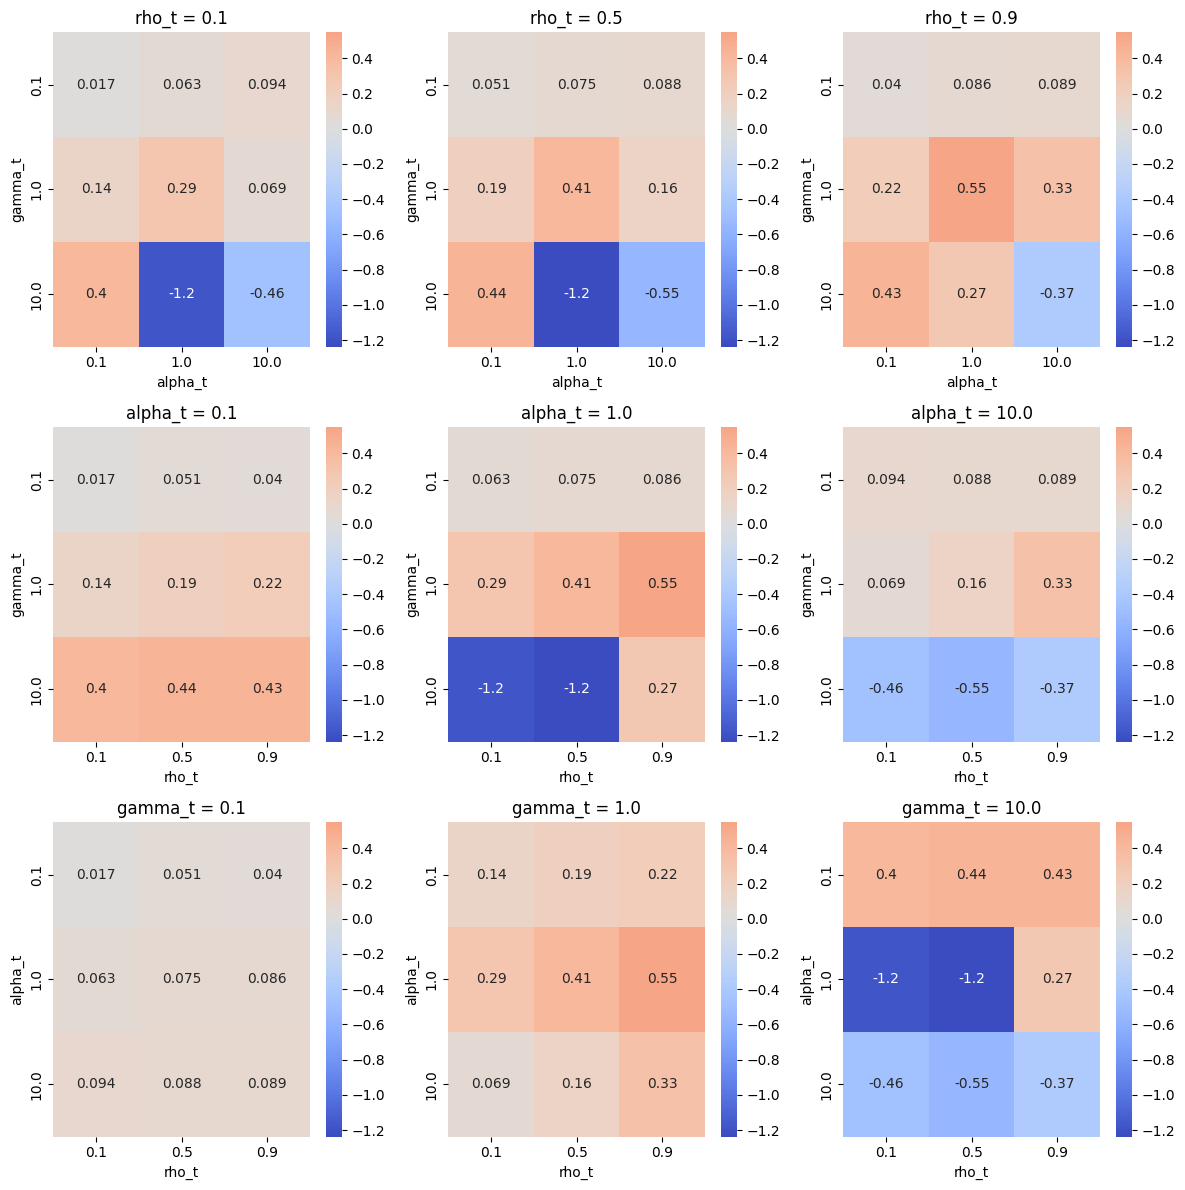

In [97]:
df_logpc_r = []

for id_config in data.keys():
    df_logpc_r_partial = pd.DataFrame.from_dict({'python': data[id_config]['Python']['logp_c_avg'],
                               'leaky': data[id_config]['Leaky']['logp_c_avg']})
    df_logpc_r_partial['config'] = id_config
    df_logpc_r_partial['alpha_t'] = data[id_config]['alpha_t']
    df_logpc_r_partial['gamma_t'] = data[id_config]['gamma_t']
    df_logpc_r_partial['rho_t'] = data[id_config]['rho_t']
    df_logpc_r_partial['n_ctx'] = data[id_config]['ctx_count']

 
    df_logpc_r.append(df_logpc_r_partial)
df_logpc_r = pd.concat(df_logpc_r, ignore_index=True)
df_logpc_r['rdif'] = (df_logpc_r['python'] - df_logpc_r['leaky']) # /df_logpy_r['leaky'] # relative point by point difference

fig, axs = plt.subplots(3, 3, figsize=(12, 12))
vmin = df_logpc_r.groupby(['alpha_t', 'gamma_t', 'rho_t'])['rdif'].apply(lambda x: x[np.isfinite(x)].median()).min()
vmax = df_logpc_r.groupby(['alpha_t', 'gamma_t', 'rho_t'])['rdif'].apply(lambda x: x[np.isfinite(x)].median()).max()
for i in range(3):
    heatmap_data = df_logpc_r[df_logpc_r['rho_t'] == df_logpc_r['rho_t'].unique()[i]].pivot_table(
        index='gamma_t', 
        columns='alpha_t', 
        values='rdif', 
        aggfunc=lambda x: x[np.isfinite(x)].median()
    )
    sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', ax=axs.flatten()[i], vmin=vmin, vmax=vmax, center=0)
    axs.flatten()[i].set_title(f"rho_t = {df_logpc_r['rho_t'].unique()[i]}")

    heatmap_data = df_logpc_r[df_logpc_r['alpha_t'] == df_logpc_r['alpha_t'].unique()[i]].pivot_table(
        index='gamma_t', 
        columns='rho_t', 
        values='rdif', 
        aggfunc=lambda x: x[np.isfinite(x)].median()
    )
    sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', ax=axs.flatten()[i+3], vmin=vmin, vmax=vmax, center=0)
    axs.flatten()[i+3].set_title(f"alpha_t = {df_logpc_r['alpha_t'].unique()[i]}")

    heatmap_data = df_logpc_r[df_logpc_r['gamma_t'] == df_logpc_r['gamma_t'].unique()[i]].pivot_table(
        index='alpha_t', 
        columns='rho_t', 
        values='rdif', 
        aggfunc=lambda x: x[np.isfinite(x)].median()
    )
    sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', ax=axs.flatten()[i+6], vmin=vmin, vmax=vmax, center=0)
    axs.flatten()[i+6].set_title(f"gamma_t = {df_logpc_r['gamma_t'].unique()[i]}")


plt.tight_layout()

# COIN vs Leaky

## Logpy

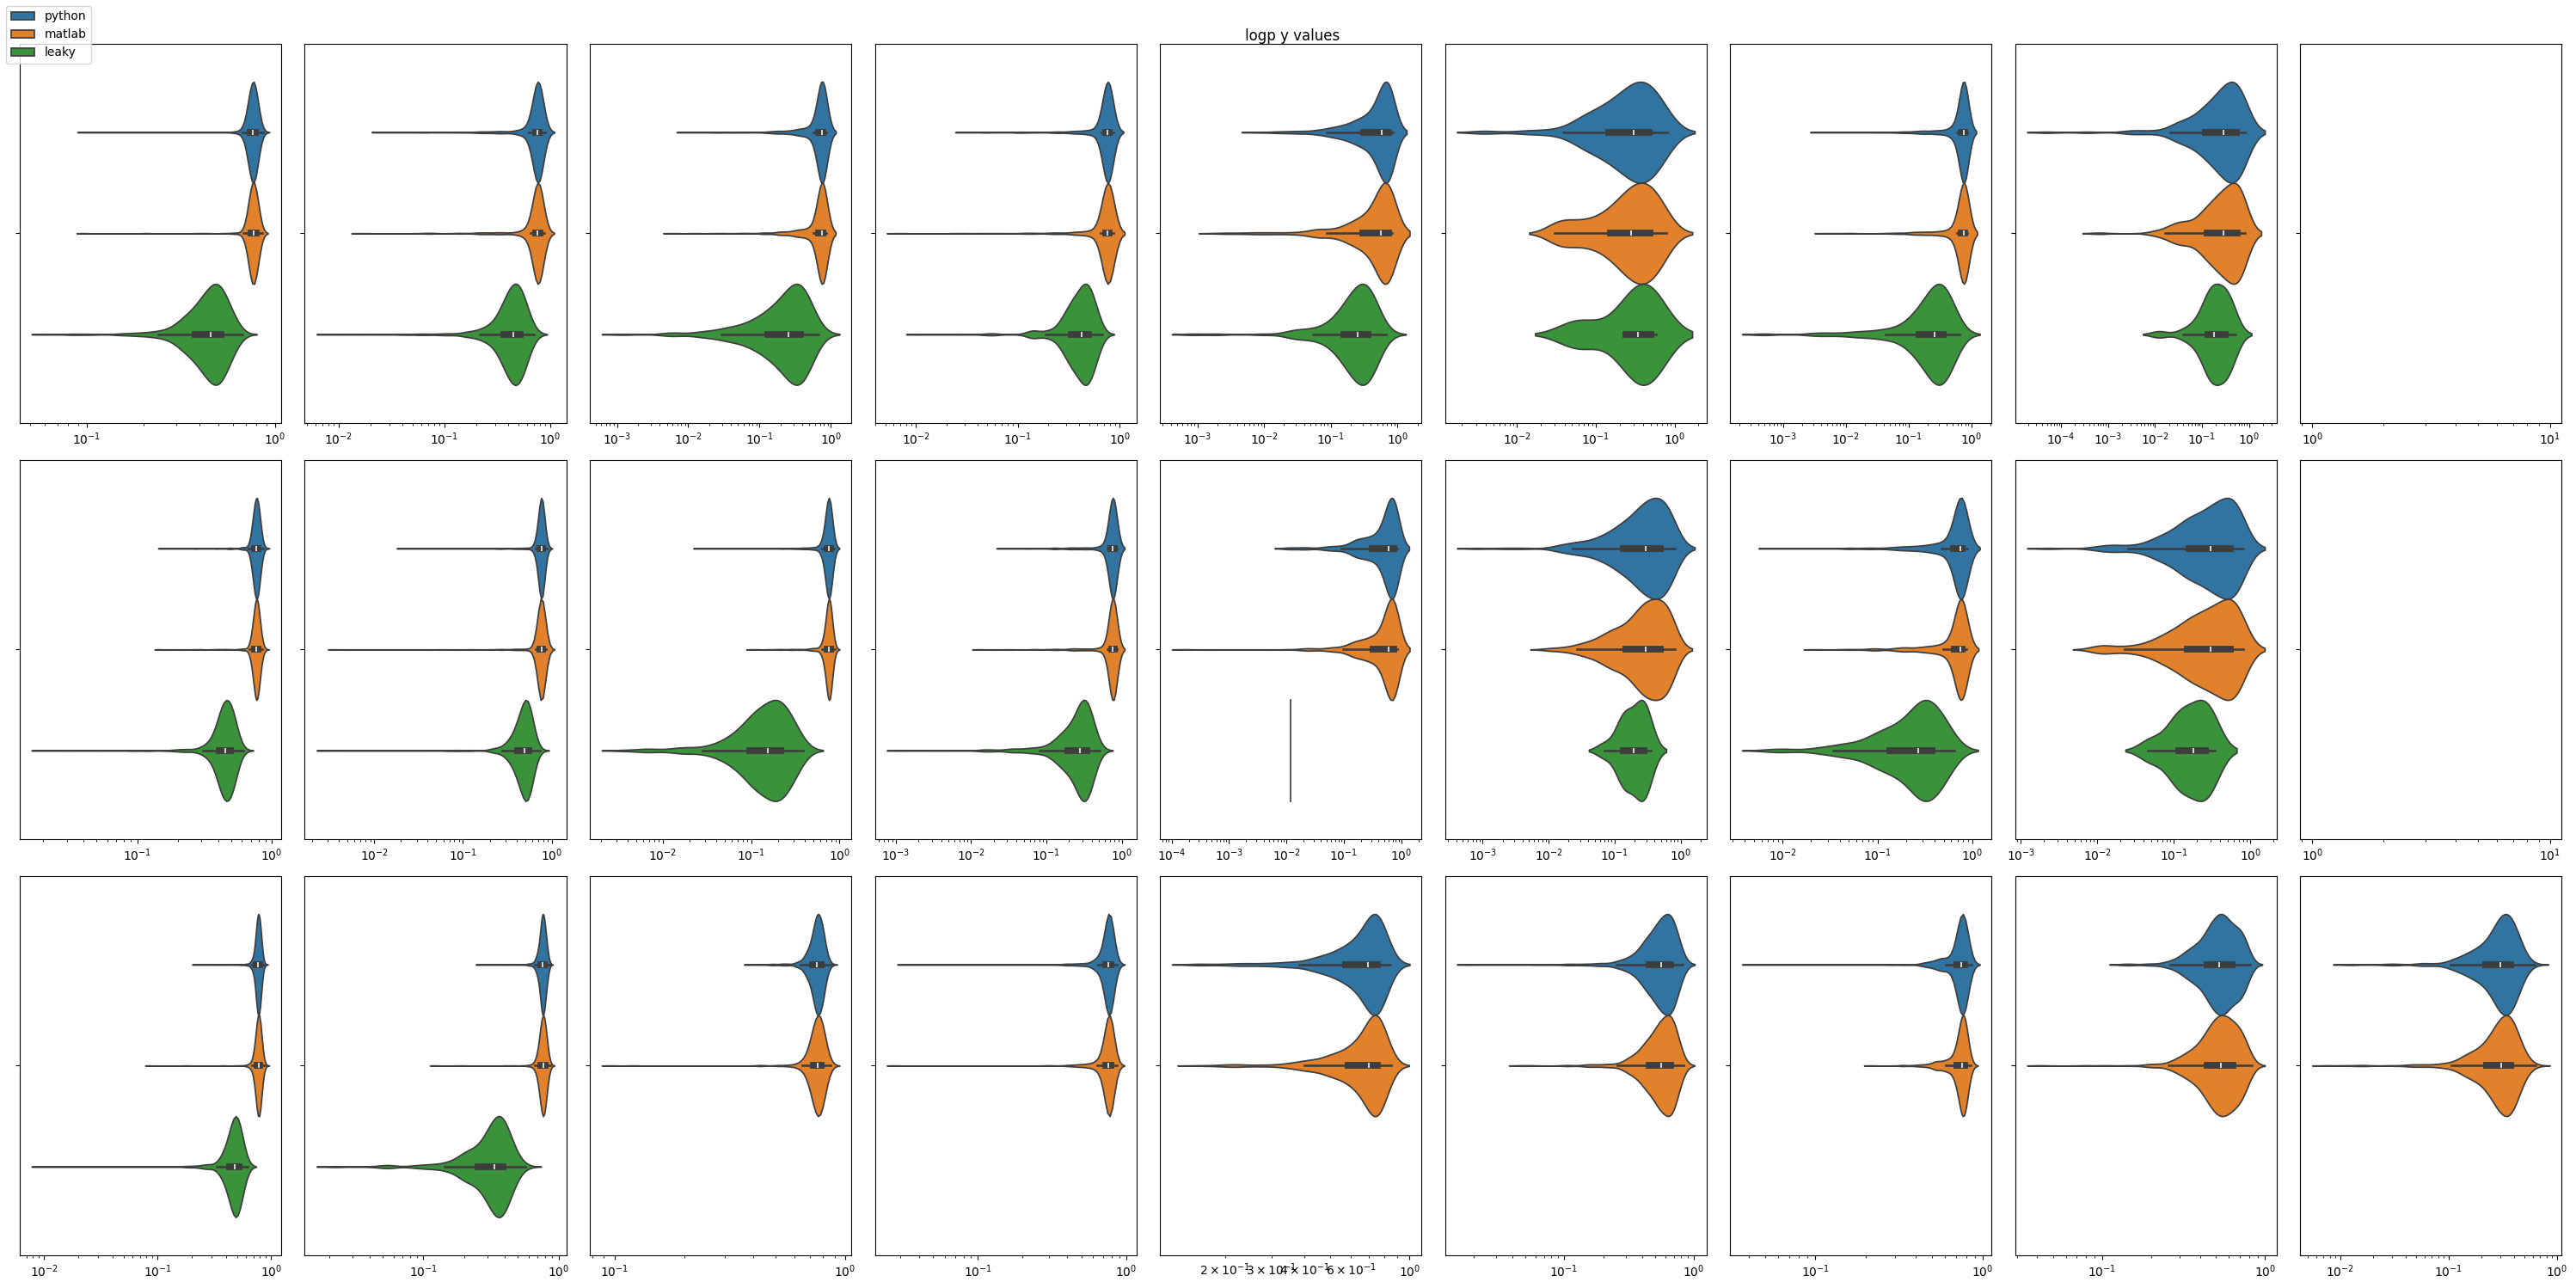

In [55]:
# Logp y (observations)

# # Clip logpy to clean extreme but rare values
# df_logpy_clipped = df_logpy_.copy()
# df_logpy_clipped['logpy'] = df_logpy_clipped['logpy'].apply(lambda x: -20 if x<-20 else x)

# # Or drop the rows
# df_logpy_cut = df_logpy_.copy()
# df_logpy_cut=df_logpy_cut[df_logpy_cut['logpy']>=-20]

krows = 3
fig, axs = plt.subplots(krows, len(data.keys())//krows, figsize=(30, 15))
for i in range(len(df_logpy_.config.unique())):
    # sns.histplot(data=df_logpy_[df_logpy_['config']==i], x='logpy', ax=axs.flatten()[i], kde=True, hue='model')
    # sns.boxplot(data=df_logpy_[df_logpy_['config']==i], x='logpy', ax=axs.flatten()[i], hue='model', log_scale=False, dodge=True, gap=0.1) #, density_norm='width')
    sns.violinplot(data=df_logpy_[df_logpy_['config']==i], x='logpy', ax=axs.flatten()[i], hue='model', log_scale=True)
    # sns.violinplot(data=df_logpy_clipped[df_logpy_clipped['config']==i], x='logpy', ax=axs.flatten()[i], hue='model', log_scale=False)
    # sns.violinplot(data=df_logpy_cut[df_logpy_cut['config']==i], x='logpy', ax=axs.flatten()[i], hue='model', log_scale=False)
    # Get 95% quantile
    q = df_logpy_[(df_logpy_['config']==i) & (df_logpy_['model']=='leaky')].logpy.quantile(0.1)
    # axs.flatten()[i].set_xlim(left=q, right=1)
    if i == 0: 
        handles, labels = axs.flatten()[i].get_legend_handles_labels()
        axs.flatten()[i].get_legend().remove()
        fig.legend(handles, labels, loc='upper left')
    else: axs.flatten()[i].get_legend().remove()
    axs.flatten()[i].set_xlabel('')
fig.suptitle('logp y values')
plt.tight_layout()


IndexError: index 14 is out of bounds for axis 0 with size 14

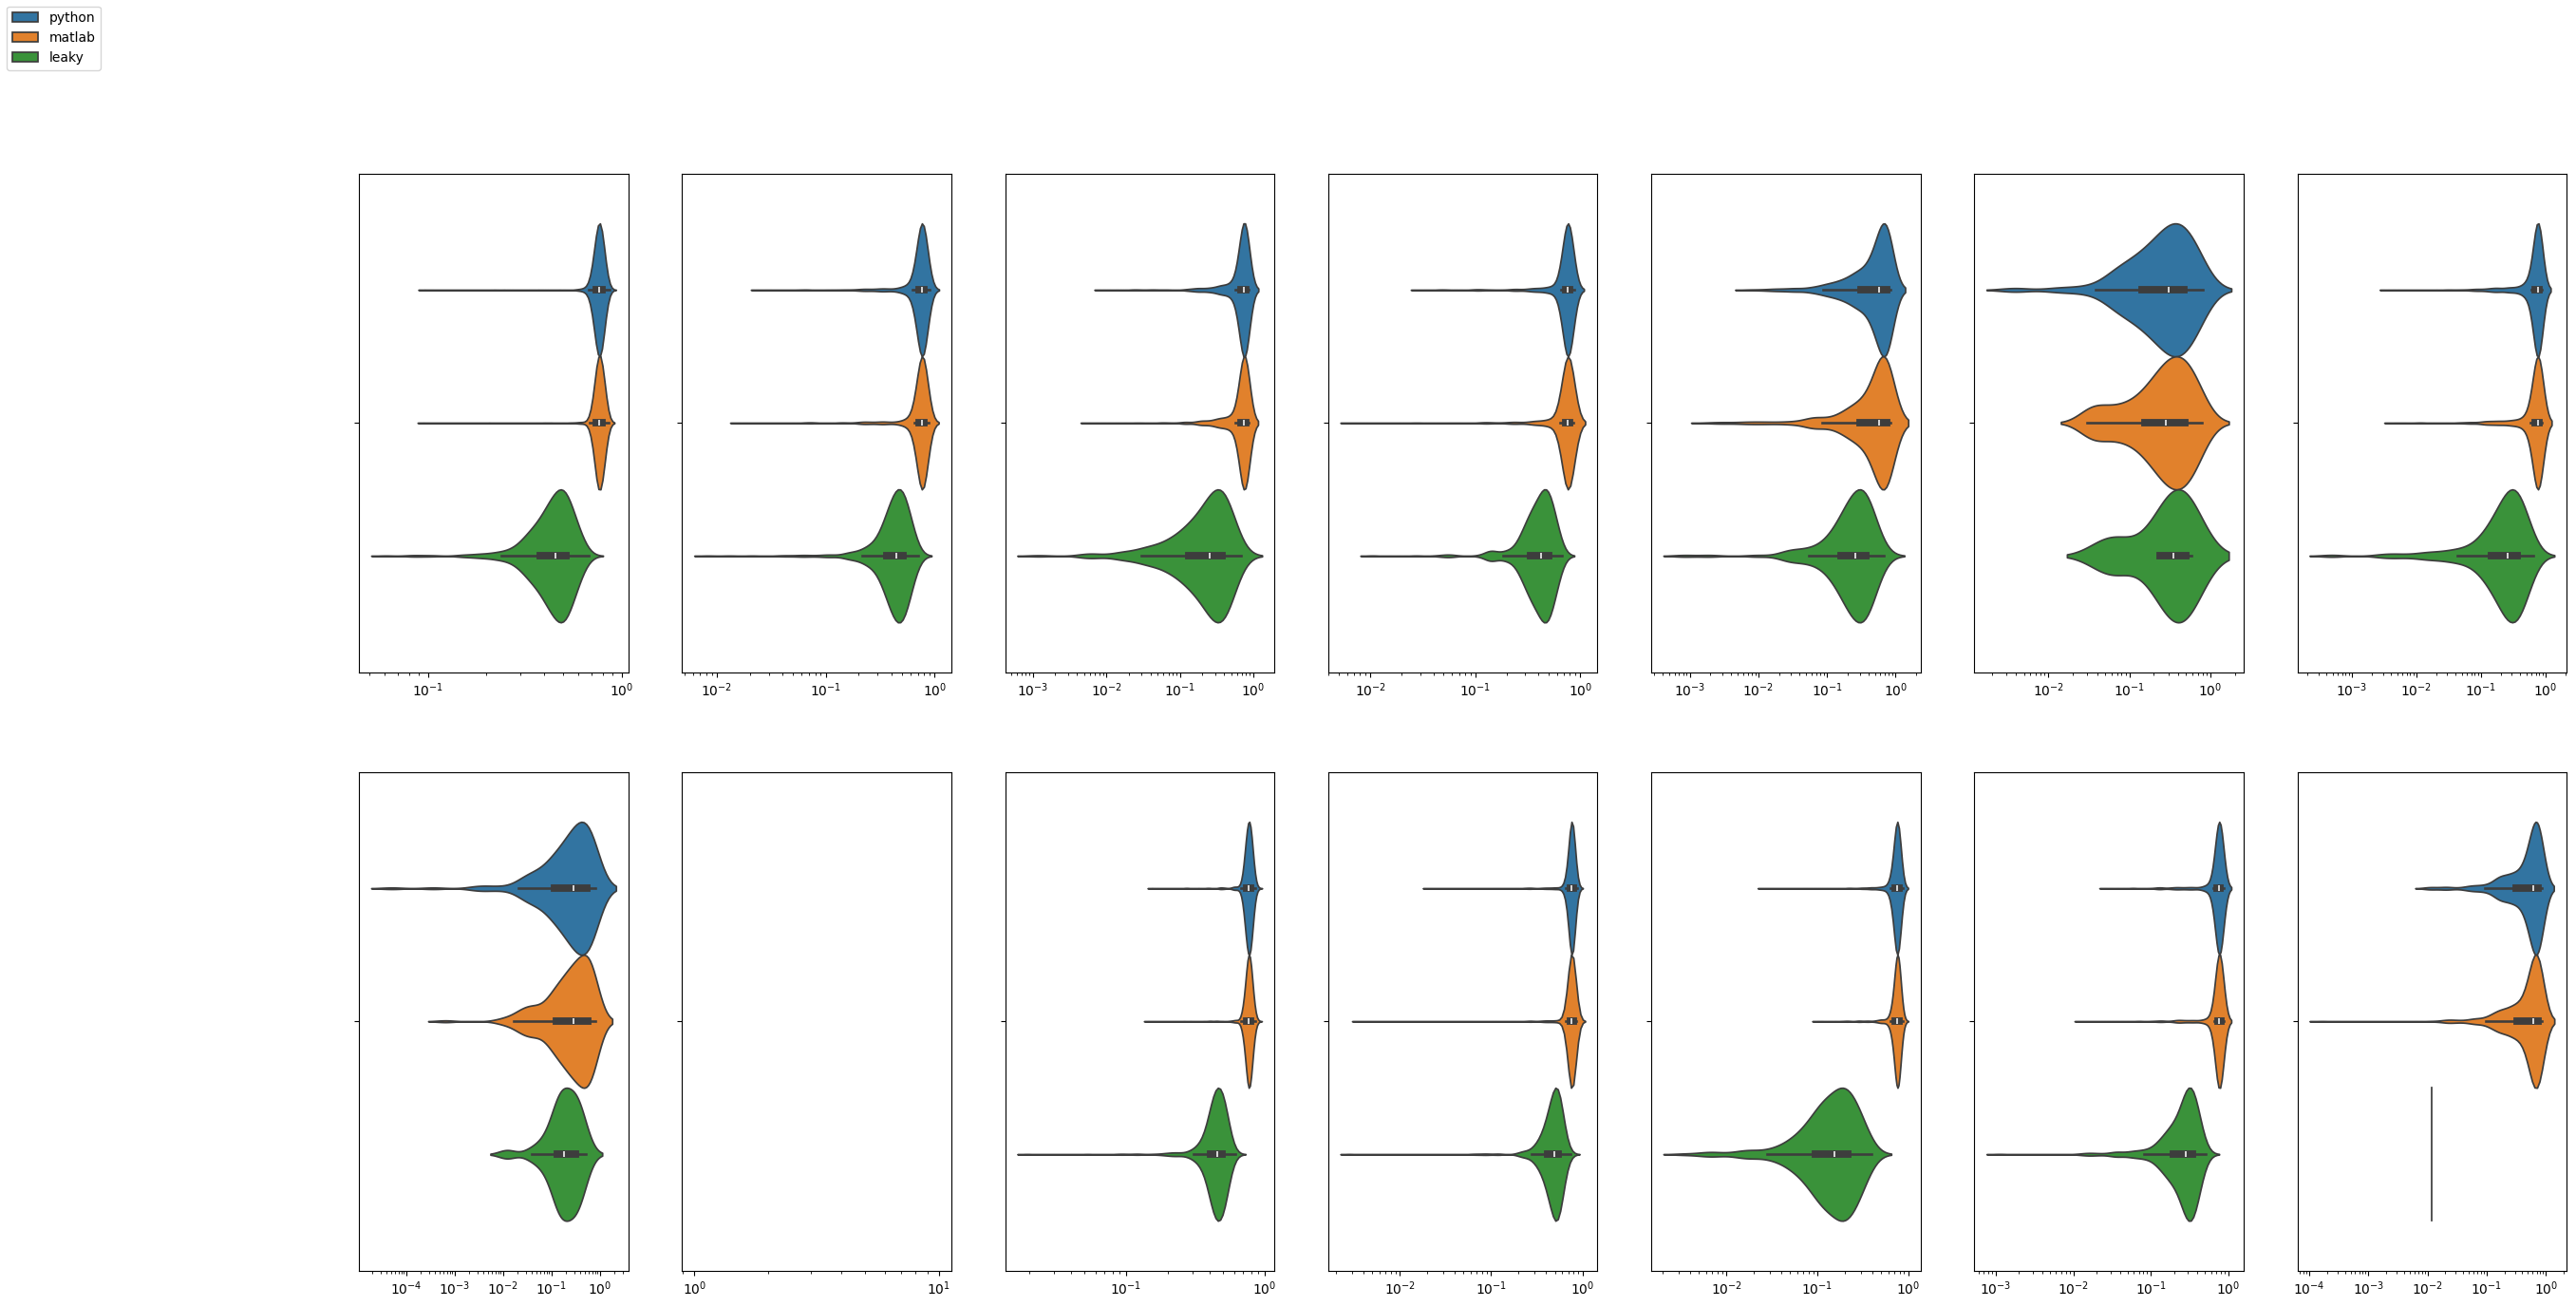

In [ ]:
# Exclude extreme configurations: 5, 13, 14, 16, >=20

# Logp y (observations)

# # Clip logpy to clean extreme but rare values
# df_logpy_clipped = df_logpy_.copy()
# df_logpy_clipped['logpy'] = df_logpy_clipped['logpy'].apply(lambda x: -20 if x<-20 else x)

# # Or drop the rows
# df_logpy_cut = df_logpy_.copy()
# df_logpy_cut=df_logpy_cut[df_logpy_cut['logpy']>=-20]

configIdsOIS = [i for i in range(5)]+[i for i in range(6, 13)]+[15, 17, 18, 19]

krows = 2
fig, axs = plt.subplots(krows, len(configIdsOIS)//krows, figsize=(30, 15))
for i, config_id in enumerate(configIdsOIS):
    # df_i = 

    # # Automatically detect whether this set has extreme outliers
    # min_val = df['value'].min()
    # max_val = df['value'].max()
    # iqr = df['value'].quantile(0.75) - df['value'].quantile(0.25)
    # lower_bound = df['value'].quantile(0.25) - 1.5 * iqr
    # upper_bound = df['value'].quantile(0.75) + 1.5 * iqr

    # if min_val < lower_bound - 5 * iqr or max_val > upper_bound + 5 * iqr:
    #     # Extreme case → clip axis
    #     ax.set_xlim(-5, 5)

    sns.violinplot(data=df_logpy_[df_logpy_['config']==i], x='logpy', ax=axs.flatten()[i], hue='model', log_scale=True)
    # sns.violinplot(data=df_logpy_clipped[df_logpy_clipped['config']==i], x='logpy', ax=axs.flatten()[i], hue='model', log_scale=False)
    # sns.violinplot(data=df_logpy_cut[df_logpy_cut['config']==i], x='logpy', ax=axs.flatten()[i], hue='model', log_scale=False)
    # Get 95% quantile
    q = df_logpy_[(df_logpy_['config']==i) & (df_logpy_['model']=='leaky')].logpy.quantile(0.1)
    # axs.flatten()[i].set_xlim(left=q, right=1)
    if i == 0: 
        handles, labels = axs.flatten()[i].get_legend_handles_labels()
        axs.flatten()[i].get_legend().remove()
        fig.legend(handles, labels, loc='upper left')
    else: axs.flatten()[i].get_legend().remove()
    axs.flatten()[i].set_xlabel('')
fig.suptitle('logp y values')
plt.tight_layout()


<Axes: xlabel='logpy'>

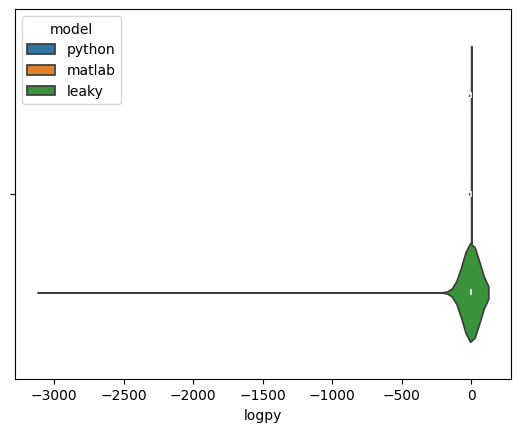

In [70]:
sns.violinplot(data=df_logpy_[df_logpy_['config']==7], x='logpy', hue='model', log_scale=False)

## Logpc

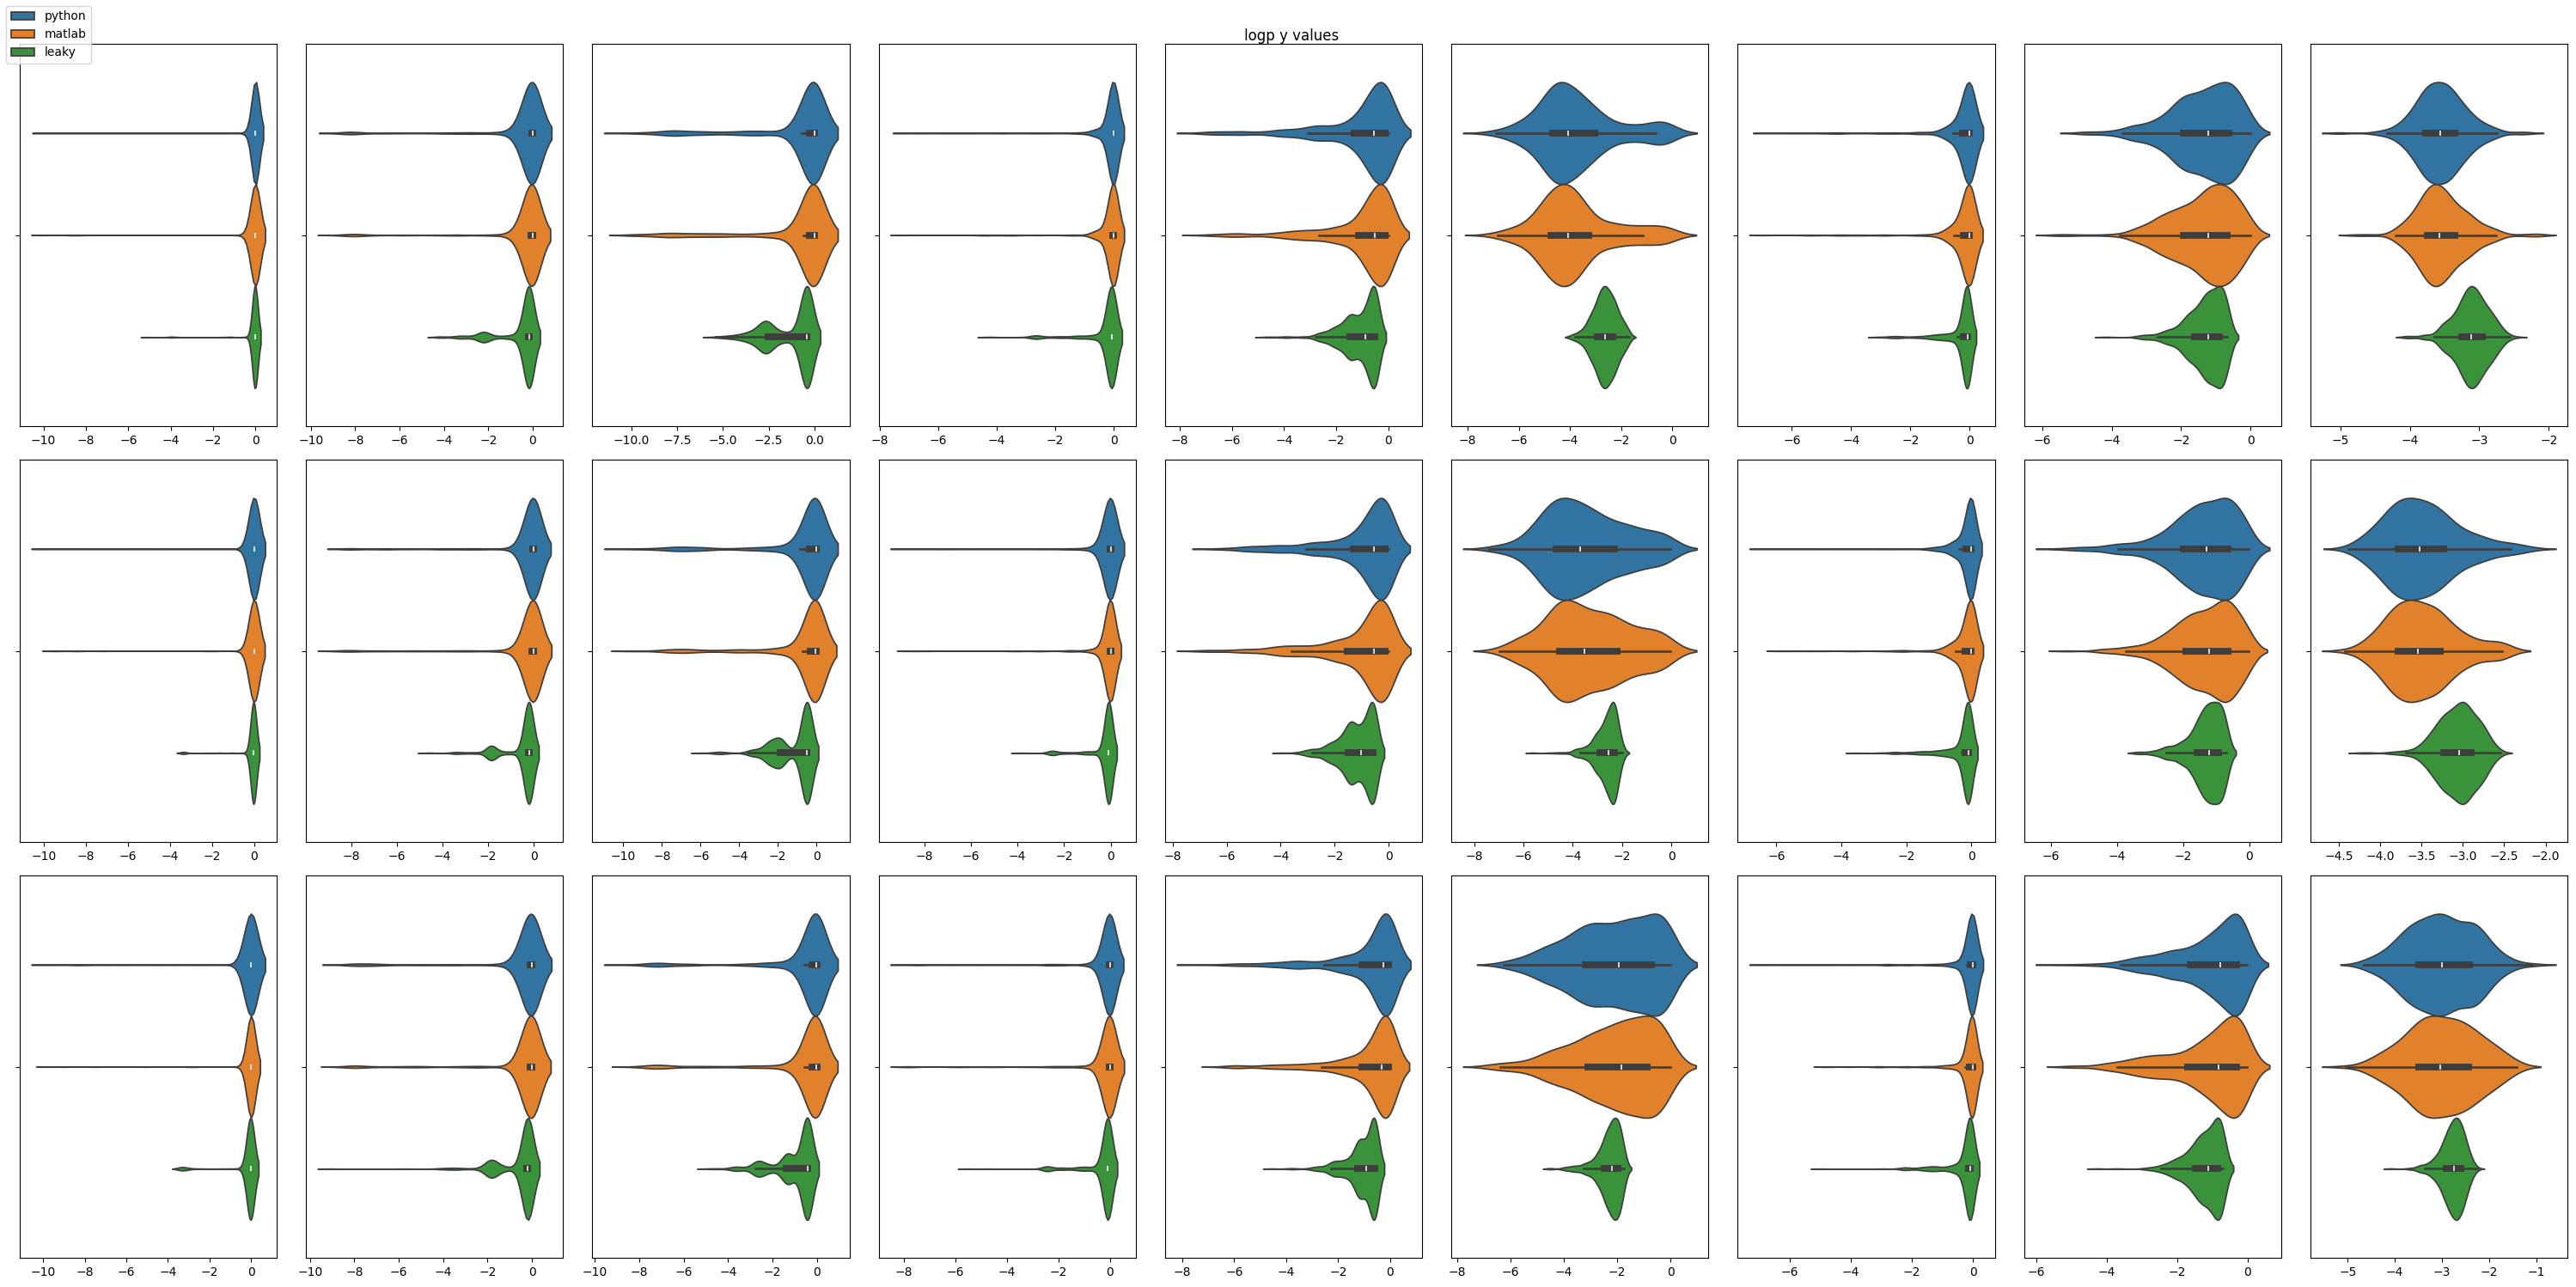

In [31]:
# Logp c (context)
krows = 3
fig, axs = plt.subplots(krows, len(data.keys())//krows, figsize=(30, 15))
for i in range(len(df_logpy_.config.unique())):
    # sns.histplot(data=df_logpy_[df_logpy_['config']==i], x='logpy', ax=axs.flatten()[i], kde=True, hue='model')
    sns.violinplot(data=df_logpc_[df_logpc_['config']==i], x='logpc', ax=axs.flatten()[i], hue='model', log_scale=False)
    if i == 0: 
        handles, labels = axs.flatten()[i].get_legend_handles_labels()
        axs.flatten()[i].get_legend().remove()
        fig.legend(handles, labels, loc='upper left')
    else: axs.flatten()[i].get_legend().remove()
    axs.flatten()[i].set_xlabel('')
fig.suptitle('logp y values')
plt.tight_layout()

In [ ]:
# Time on some config
# collect the MSE
# Add parallel processing in the hyperconfig scan
# Viz of the differences between leaky and COIN (distr, heatmap of the differences)
# Figure for Python Vs Matlab (also logp c) 
# --> post on github (include the values of the configs params) (include a Readme, include a note about timing on some hyperparametrization) ... also remove comments and clean code